# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data

Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col=0)

loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col=0)

ref_catefories = pd.read_csv('ref_categorie.csv', index_col=0)

In [3]:
loan_data_backup = pd.read_csv('new_data.csv')

Explore Data

In [4]:
loan_data = loan_data_backup.copy()

In [5]:
pd.options.display.max_columns = None

In [6]:
loan_data.head()

Unnamed: 0  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0 NaN        NaN       5000         5000           5000.0   
1           1 NaN        NaN      10000        10000          10000.0   
2           2 NaN        NaN      11000        11000          11000.0   
3           3 NaN        NaN      24250        24250          24250.0   
4           4 NaN        NaN      35000        35000          35000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.41       162.31     B        B3   
1   60 months     10.42       214.55     B        B3   
2   36 months     11.14       360.86     B        B2   
3   60 months     13.18       554.00     C        C3   
4   36 months     10.07      1130.51     B        B2   

                  emp_title emp_length home_ownership  annual_inc  \
0                    Server    8 years           RENT     50000.0   
1  Administrative Assistant  10+ years       MORTGAGE     60000.0   
2        Premera Blue Cross    5 years       MORTGAGE     65000.0   
3      Propane truck driver     1 year           RENT     72000.0   
4                 Engineer   10+ years            OWN    100000.0   

  verification_status   issue_d loan_status pymnt_plan  url  \
0     Source Verified  Mar-2018     Current          n  NaN   
1     Source Verified  Oct-2017     Current          n  NaN   
2        Not Verified  Sep-2012  Fully Paid          n  NaN   
3        Not Verified  Dec-2015  Fully Paid          n  NaN   
4     Source Verified  Jun-2018     Current          n  NaN   

                                                desc             purpose  \
0                                                NaN               other   
1                                                NaN    home_improvement   
2    Borrower added on 08/14/12 > pay off credit ...         credit_card   
3                                                NaN  debt_consolidation   
4                                                NaN  debt_consolidation   

                     title zip_code addr_state    dti  delinq_2yrs  \
0                    Other    220xx         VA  21.27          0.0   
1         Home improvement    152xx         PA  19.28          0.0   
2  Credit Card payoff loan    990xx         WA  26.84          0.0   
3       Debt consolidation    945xx         CA  14.27          0.0   
4       Debt consolidation    450xx         OH  12.85          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Aug-2004             0.0                     NaN   
1         Mar-1981             0.0                    53.0   
2         Jul-1990             1.0                    63.0   
3         Nov-2006             1.0                     NaN   
4         Mar-1997             0.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      24161        96.6   
1                     NaN      16.0      0.0      45394        27.5   
2                     NaN      14.0      0.0       4945        33.4   
3                     NaN      11.0      0.0       8010        19.4   
4                     NaN      12.0      0.0      31212        95.4   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0       11.0                   w    1384.31        1384.31   3921.730000   
1       42.0                   w    7817.90        7817.90   3427.010000   
2       30.0                   f       0.00           0.00  12990.773535   
3       15.0                   w       0.00           0.00  24621.410000   
4       22.0                   w   28105.63       28105.63   9024.500000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          3921.73          3615.69         306.04                 0.0   
1          3427.01          2182.10        1244.91                 0.0   
2         12990.77         11000.00        1990.77                 0.0   
3 

In [10]:
loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565167 entries, 0 to 565166
Data columns (total 147 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    Unnamed: 0                                  565167 non-null  int64  
 1    id                                          0 non-null       float64
 2    member_id                                   0 non-null       float64
 3    loan_amnt                                   565167 non-null  int64  
 4    funded_amnt                                 565167 non-null  int64  
 5    funded_amnt_inv                             565167 non-null  float64
 6    term                                        565167 non-null  object 
 7    int_rate                                    565167 non-null  float64
 8    installment                                 565167 non-null  float64
 9    grade                                       565167 non-nu

# Population Stability Index (PSI): Preprocessing

# >>> The code down to here is copied form the preprocesing part.

# General Preprocessing 

Preprocessing countinous variables

Time related furures

In [8]:
loan_data['emp_length'].unique()

array(['8 years', '10+ years', '5 years', '1 year', '2 years', '< 1 year',
       nan, '7 years', '4 years', '9 years', '3 years', '6 years'],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('nan', str(0))

In [10]:
loan_data['emp_length_int'].unique()

array(['8', '10', '5', '1', '2', '0', nan, '7', '4', '9', '3', '6'],
      dtype=object)

In [11]:
type(loan_data['emp_length_int'][0])

str

In [12]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [13]:
loan_data['emp_length_int'].unique()

array([ 8., 10.,  5.,  1.,  2.,  0., nan,  7.,  4.,  9.,  3.,  6.])

In [14]:
type(loan_data['emp_length_int'].unique()[6])

numpy.float64

In [15]:
loan_data['earliest_cr_line'].head()

0    Aug-2004
1    Mar-1981
2    Jul-1990
3    Nov-2006
4    Mar-1997
Name: earliest_cr_line, dtype: object

In [16]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'])

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\3502084455.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'])


In [17]:
loan_data['earliest_cr_line_date']

0        2004-08-01
1        1981-03-01
2        1990-07-01
3        2006-11-01
4        1997-03-01
            ...    
565162   2006-01-01
565163   1999-12-01
565164   2002-03-01
565165   1994-07-01
565166   2011-02-01
Name: earliest_cr_line_date, Length: 565167, dtype: datetime64[ns]

In [18]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0         4870 days
1        13424 days
2        10015 days
3         4048 days
4         7580 days
            ...    
565162    4352 days
565163    6575 days
565164    5754 days
565165    8554 days
565166    2495 days
Name: earliest_cr_line_date, Length: 565167, dtype: timedelta64[ns]

In [19]:
(pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / pd.to_timedelta('30d') # / np.timedelta64(1, 'M'),  pd.to_timedelta('1M')<-- Not good

0         162.333333
1         447.466667
2         333.833333
3         134.933333
4         252.666667
             ...    
565162    145.066667
565163    219.166667
565164    191.800000
565165    285.133333
565166     83.166667
Name: earliest_cr_line_date, Length: 565167, dtype: float64

In [20]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / pd.to_timedelta('30d')))

In [21]:
pd.set_option('float_format', '{:.2f}'.format)

In [22]:
loan_data['mths_since_earliest_cr_line'].head()

0   162.00
1   447.00
2   334.00
3   135.00
4   253.00
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
loan_data['mths_since_earliest_cr_line'].describe()

count   565157.00
mean       218.73
std         95.43
min         25.00
25%        153.00
50%        202.00
75%        269.00
max       1019.00
Name: mths_since_earliest_cr_line, dtype: float64

In [24]:
# loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

In [25]:
loan_data['mths_since_earliest_cr_line'].max()

1019.0

In [26]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [27]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ', '')

In [28]:
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [29]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [30]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

In [31]:
loan_data['issue_d'].head()

0    Mar-2018
1    Oct-2017
2    Sep-2012
3    Dec-2015
4    Jun-2018
Name: issue_d, dtype: object

In [32]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'])

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\3672562545.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'])


In [33]:
loan_data['issue_date'].head()

0   2018-03-01
1   2017-10-01
2   2012-09-01
3   2015-12-01
4   2018-06-01
Name: issue_date, dtype: datetime64[ns]

In [34]:
loan_data['mths_since_issue_date'] = round(pd.to_numeric((pd.to_datetime('2021-12-01') - loan_data['issue_date']) / pd.to_timedelta('30d')))

In [35]:
loan_data['mths_since_issue_date'].describe()

count   565167.00
mean        68.01
std         21.73
min         37.00
25%         50.00
50%         66.00
75%         81.00
max        177.00
Name: mths_since_issue_date, dtype: float64

Preprocesing discrete variables

In [36]:
loan_data['grade'].unique()

array(['B', 'C', 'G', 'A', 'F', 'D', 'E'], dtype=object)

In [37]:
pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':', dtype='int')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        1        0        0        0        0        0
2             0        1        0        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
565162        0        0        1        0        0        0        0
565163        0        0        1        0        0        0        0
565164        0        0        0        1        0        0        0
565165        0        1        0        0        0        0        0
565166        0        0        1        0        0        0        0

[565167 rows x 7 columns]

Check for missing values

In [38]:
pd.options.display.max_rows = None

In [39]:
loan_data.isnull().sum()

Unnamed: 0                                         0
id                                            565167
member_id                                     565167
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      41955
emp_length                                     36946
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                    

In [40]:
loan_data[['total_rev_hi_lim', 'annual_inc', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'mths_since_earliest_cr_line', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int']].isnull().sum()

total_rev_hi_lim               17428
annual_inc                         0
acc_now_delinq                    10
total_acc                         10
pub_rec                           10
open_acc                          10
mths_since_earliest_cr_line       10
inq_last_6mths                    11
delinq_2yrs                       10
emp_length_int                 36946
dtype: int64

In [41]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [42]:
loan_data[['total_rev_hi_lim', 'annual_inc', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'mths_since_earliest_cr_line', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int']].isnull().sum()

total_rev_hi_lim               0
annual_inc                     0
acc_now_delinq                 0
total_acc                      0
pub_rec                        0
open_acc                       0
mths_since_earliest_cr_line    0
inq_last_6mths                 0
delinq_2yrs                    0
emp_length_int                 0
dtype: int64

# Data preparation for PD model

Dependent Variable. Good/Bad (Default) Definition. Default and Non-default Accounts.

In [43]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid                                             261114
Current                                                229398
Charged Off                                             65281
Late (31-120 days)                                       5516
In Grace Period                                          2272
Late (16-30 days)                                         899
Does not meet the credit policy. Status:Fully Paid        495
Does not meet the credit policy. Status:Charged Off       187
Default                                                     5
Name: count, dtype: int64

In [44]:
pd.set_option('float_format', '{:.6f}'.format)

In [45]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Fully Paid                                            0.462012
Current                                               0.405894
Charged Off                                           0.115507
Late (31-120 days)                                    0.009760
In Grace Period                                       0.004020
Late (16-30 days)                                     0.001591
Does not meet the credit policy. Status:Fully Paid    0.000876
Does not meet the credit policy. Status:Charged Off   0.000331
Default                                               0.000009
Name: count, dtype: float64

In [46]:
default_loans = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']

loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(default_loans), 0, 1)

Data preparation

In [47]:
df_inputs_prepr = loan_data.drop('good_bad', axis=1)
df_targets_prepr = loan_data['good_bad']

In [48]:
df_inputs_prepr['grade'].value_counts()

grade
B    165918
C    162470
A    108332
D     81203
E     33861
F     10395
G      2988
Name: count, dtype: int64

In [49]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)

In [50]:
df1.head()

grade  good_bad
0     B         1
1     B         1
2     B         1
3     C         1
4     B         1

In [51]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A    108332
1     B    165918
2     C    162470
3     D     81203
4     E     33861
5     F     10395
6     G      2988

In [52]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.964960
1     B  0.915832
2     C  0.859654
3     D  0.801042
4     E  0.724226
5     F  0.638961
6     G  0.605422

In [53]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()],
                 axis=1)

In [54]:
df1

grade  good_bad grade  good_bad
0     A    108332     A  0.964960
1     B    165918     B  0.915832
2     C    162470     C  0.859654
3     D     81203     D  0.801042
4     E     33861     E  0.724226
5     F     10395     F  0.638961
6     G      2988     G  0.605422

In [55]:
df1 = df1.iloc[ : , [0, 1, 3]]

In [56]:
df1

grade  good_bad  good_bad
0     A    108332  0.964960
1     B    165918  0.915832
2     C    162470  0.859654
3     D     81203  0.801042
4     E     33861  0.724226
5     F     10395  0.638961
6     G      2988  0.605422

In [57]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [58]:
df1

grade   n_obs  prop_good  prop_n_obs
0     A  108332   0.964960    0.191681
1     B  165918   0.915832    0.293573
2     C  162470   0.859654    0.287473
3     D   81203   0.801042    0.143680
4     E   33861   0.724226    0.059913
5     F   10395   0.638961    0.018393
6     G    2988   0.605422    0.005287

In [59]:
# Number of good and bad borrowers for each grade 
df1['n_good'] = df1['n_obs'] * df1['prop_good']
df1['n_bad'] = df1['n_obs'] * (1 - df1['prop_good'])

# Proportion of good and bad borrowers for each grade 
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [60]:
df1

grade   n_obs  prop_good  prop_n_obs        n_good        n_bad  \
0     A  108332   0.964960    0.191681 104536.000000  3796.000000   
1     B  165918   0.915832    0.293573 151953.000000 13965.000000   
2     C  162470   0.859654    0.287473 139668.000000 22802.000000   
3     D   81203   0.801042    0.143680  65047.000000 16156.000000   
4     E   33861   0.724226    0.059913  24523.000000  9338.000000   
5     F   10395   0.638961    0.018393   6642.000000  3753.000000   
6     G    2988   0.605422    0.005287   1809.000000  1179.000000   

   prop_n_good  prop_n_bad  
0     0.211535    0.053473  
1     0.307486    0.196721  
2     0.282627    0.321205  
3     0.131627    0.227585  
4     0.049624    0.131542  
5     0.013441    0.052867  
6     0.003661    0.016608

WoE

In [61]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)


In [62]:
df1

grade   n_obs  prop_good  prop_n_obs        n_good        n_bad  \
0     G    2988   0.605422    0.005287   1809.000000  1179.000000   
1     F   10395   0.638961    0.018393   6642.000000  3753.000000   
2     E   33861   0.724226    0.059913  24523.000000  9338.000000   
3     D   81203   0.801042    0.143680  65047.000000 16156.000000   
4     C  162470   0.859654    0.287473 139668.000000 22802.000000   
5     B  165918   0.915832    0.293573 151953.000000 13965.000000   
6     A  108332   0.964960    0.191681 104536.000000  3796.000000   

   prop_n_good  prop_n_bad       WoE  
0     0.003661    0.016608 -1.512263  
1     0.013441    0.052867 -1.369513  
2     0.049624    0.131542 -0.974851  
3     0.131627    0.227585 -0.547552  
4     0.282627    0.321205 -0.127951  
5     0.307486    0.196721  0.446646  
6     0.211535    0.053473  1.375213

In [63]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs() # It is show how much WoE increase to one class to the next 

# IV = Information Value
df1['IV'] = ((df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']).sum()

In [64]:
df1

grade   n_obs  prop_good  prop_n_obs        n_good        n_bad  \
0     G    2988   0.605422    0.005287   1809.000000  1179.000000   
1     F   10395   0.638961    0.018393   6642.000000  3753.000000   
2     E   33861   0.724226    0.059913  24523.000000  9338.000000   
3     D   81203   0.801042    0.143680  65047.000000 16156.000000   
4     C  162470   0.859654    0.287473 139668.000000 22802.000000   
5     B  165918   0.915832    0.293573 151953.000000 13965.000000   
6     A  108332   0.964960    0.191681 104536.000000  3796.000000   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.003661    0.016608 -1.512263             NaN       NaN 0.477753  
1     0.013441    0.052867 -1.369513        0.033539  0.142750 0.477753  
2     0.049624    0.131542 -0.974851        0.085264  0.394662 0.477753  
3     0.131627    0.227585 -0.547552        0.076816  0.427299 0.477753  
4     0.282627    0.321205 -0.127951        0.058612  0.419601 0.477753  
5     0.307486    0.196721  0.446646        0.056178  0.574597 0.477753  
6     0.211535    0.053473  1.375213        0.049128  0.928567 0.477753

Preprocessing Discrete Variables: Automating Calculations

In [65]:
def woe_discrete(df, discrete_vatiable_name, good_bad_vatriable_df):
    df = pd.concat([df[discrete_vatiable_name], good_bad_vatriable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
                    axis=1)
    df = df.iloc[ :, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # The proportion of observations that fals in each subcategory
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['n_obs'] * df['prop_good']
    df['n_bad'] = df['n_obs'] * (1 - df['prop_good'])
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()

    return df

def st(df_styled):
    return df_styled.style.bar(subset=['prop_n_obs', 'WoE'], color=['red', 'green'], vmax=1)


In [66]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

V: grade

In [67]:
st(df_temp)

Preprocessing Discrete Variables: Results Visualization 

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='ticks', context='talk')

In [69]:
def plot_by_woe(df_WoE, rotation_of_x_axis_label = 0):

    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    z = df_WoE['prop_n_obs']

    plt.style.use('dark_background')

    plt.figure(figsize = (18, 6))
    plt.grid(color = 'w', linestyle = '--', linewidth = 0.5)
    plt.axhline(y=0, color='c', linewidth=2)
    plt.bar(x, z*10, color='lightgreen', alpha=0.5)
    plt.plot(x, y, marker = 'o', color = 'w', linestyle = '--')

    plt.title(f'Weight of Evidence by {df_WoE.columns[0]}')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')

    plt.xticks(rotation = rotation_of_x_axis_label)

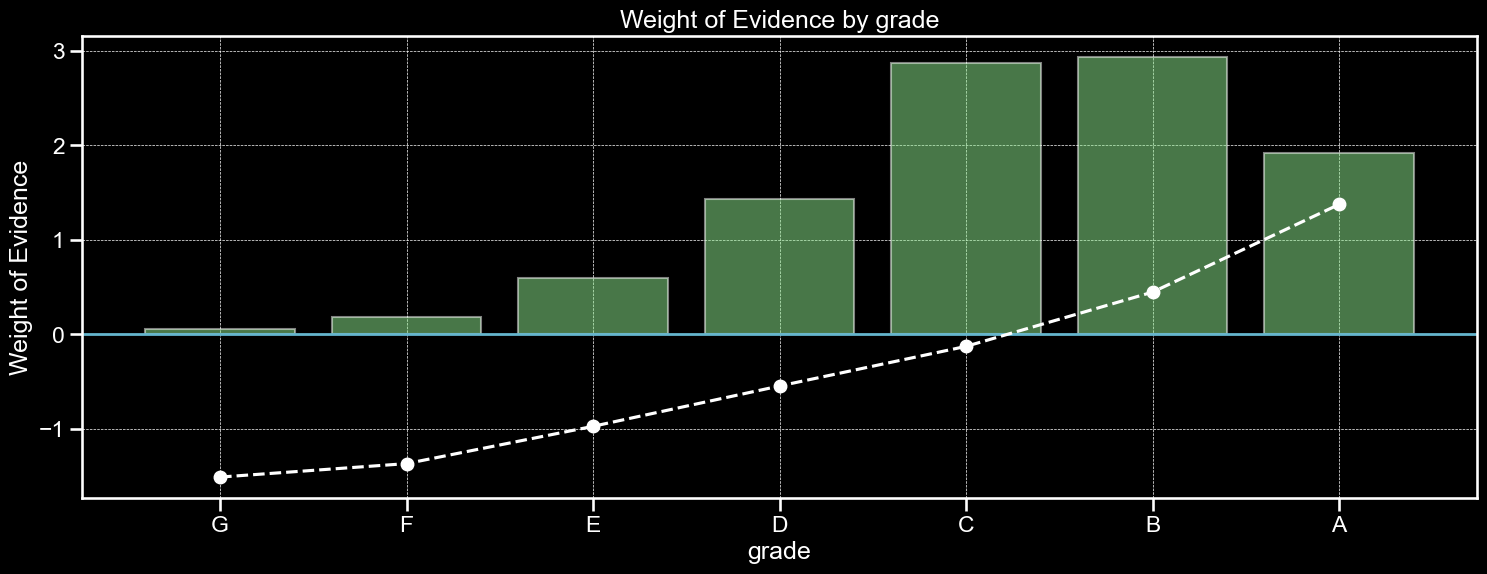

In [70]:
plot_by_woe(df_temp)

In [71]:
row__dummies = [pd.get_dummies(df_inputs_prepr['grade'], prefix='grade', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['sub_grade'], prefix='sub_grade', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['home_ownership'], prefix='home_ownership', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['verification_status'], prefix='verification_status', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['loan_status'], prefix='loan_status', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['purpose'], prefix='purpose', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['addr_state'], prefix='addr_state', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['initial_list_status'], prefix='initial_list_status', prefix_sep=':', dtype='int')]

In [72]:
# Storing the dummies variables for the PD model
loan_data_row_dummies = pd.concat(row__dummies, axis=1)

In [73]:
loan_data_row_dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0        0        1        0        0        0        0        0   
1        0        1        0        0        0        0        0   
2        0        1        0        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0             0             0             1             0             0   
1             0             0             1             0             0   
2             0             1             0             0             0   
3             0             0             0             0             0   
4             0             1             0             0             0   

   sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             1             0             0   
4             0             0             0             0             0   

   sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:E1  sub_grade:E2  sub_grade:E3  sub_grade:E4  sub_grade:E5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:F1  sub_grade:F2  sub_grade:F3  sub_grade:F4  sub_grade:F5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:G1  sub_grade:G2  sub_grade:G3  sub_grade:G4  sub_grade:G5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   home_ownership:ANY  home_ownership:MORTGAGE  home_ownership:NONE  \
0                   0                        0                    0   
1                   0                        1                    0   
2                   0                        1                    0   
3                   0                        0                    0   
4                   0                        0                    0   

   home_ow

In [74]:
dummies = pd.get_dummies(df_inputs_prepr['grade'], prefix='grade', prefix_sep=':', dtype='int')

In [75]:
# Reference dummy variable
ref_categorie = ['grade:G']

In [76]:
dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0        0        1        0        0        0        0        0
1        0        1        0        0        0        0        0
2        0        1        0        0        0        0        0
3        0        0        1        0        0        0        0
4        0        1        0        0        0        0        0

V: home_ownership

In [77]:
df_inputs_prepr['home_ownership'].value_counts()

home_ownership
MORTGAGE    277829
RENT        223689
OWN          63354
ANY            236
OTHER           48
NONE            11
Name: count, dtype: int64

In [78]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
st(df_temp)

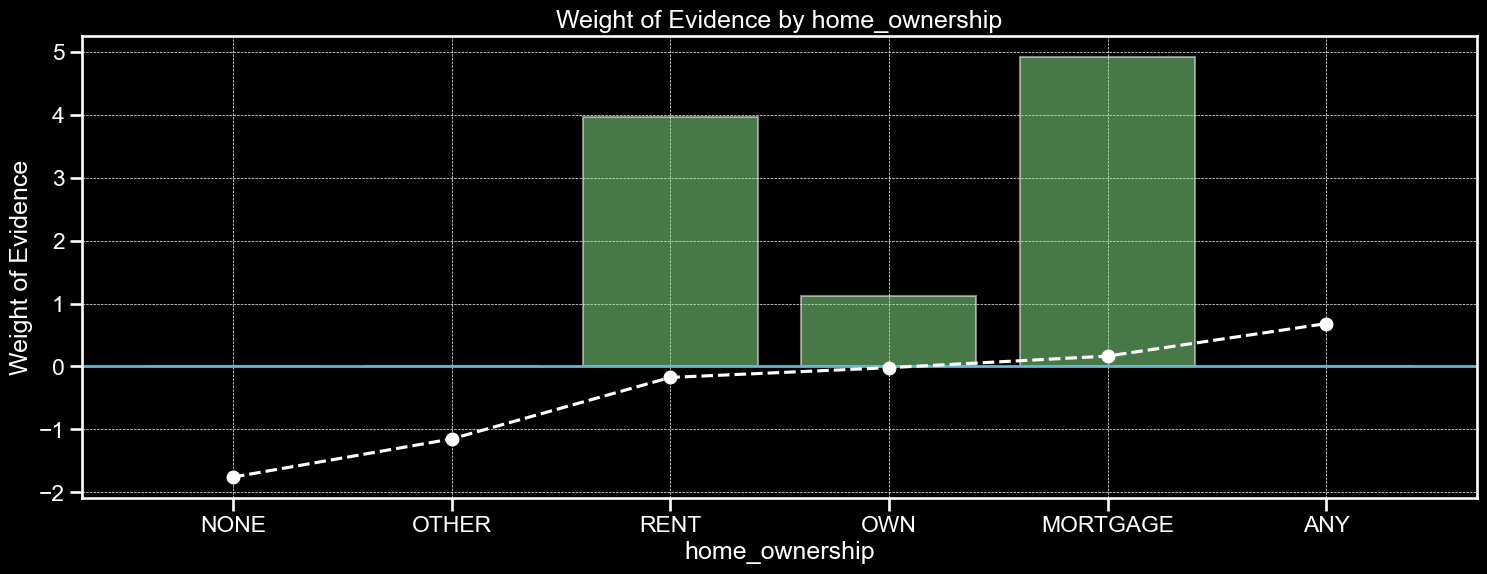

In [79]:
plot_by_woe(df_temp)

In [80]:
dummies['home_ownership:ONE_ATHER_ANY'] = sum([loan_data_row_dummies['home_ownership:NONE'],
                                               loan_data_row_dummies['home_ownership:OTHER'],
                                               loan_data_row_dummies['home_ownership:ANY']])

dummies = pd.concat([dummies, 
                     loan_data_row_dummies[['home_ownership:RENT', 'home_ownership:OWN', 'home_ownership:MORTGAGE']]], 
                     axis=1)

ref_categorie.append('home_ownership:ONE_ATHER_ANY')

In [81]:
dummies.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:ONE_ATHER_ANY', 'home_ownership:RENT',
       'home_ownership:OWN', 'home_ownership:MORTGAGE'], dtype=object)

In [82]:
dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0        0        1        0        0        0        0        0   
1        0        1        0        0        0        0        0   
2        0        1        0        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   home_ownership:ONE_ATHER_ANY  home_ownership:RENT  home_ownership:OWN  \
0                             0                    1                   0   
1                             0                    0                   0   
2                             0                    0                   0   
3                             0                    1                   0   
4                             0                    0                   1   

   home_ownership:MORTGAGE  
0                        0  
1                        1  
2                        1  
3                        0  
4                        0

V: addr_state


In [83]:
df_inputs_prepr['addr_state'].unique()

array(['VA', 'PA', 'WA', 'CA', 'OH', 'GA', 'NM', 'NV', 'TX', 'NY', 'NE',
       'MN', 'IN', 'AZ', 'SC', 'MS', 'UT', 'FL', 'AL', 'CO', 'WV', 'OR',
       'MD', 'NJ', 'IL', 'MI', 'TN', 'MO', 'NC', 'MA', 'CT', 'WI', 'HI',
       'MT', 'ID', 'AK', 'ND', 'RI', 'AR', 'WY', 'KS', 'LA', 'VT', 'OK',
       'KY', 'NH', 'SD', 'DC', 'DE', 'ME', 'IA'], dtype=object)

In [84]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
st(df_temp)

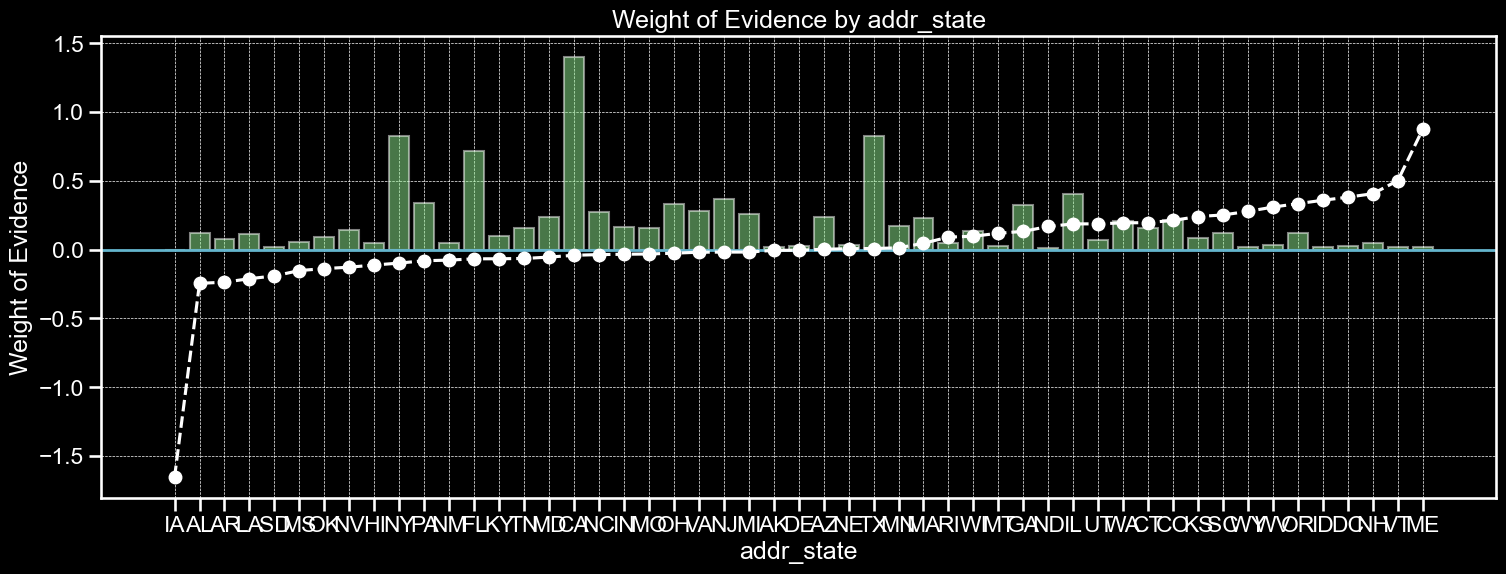

In [85]:
plot_by_woe(df_temp)

In [86]:
# AI

# VT_ME

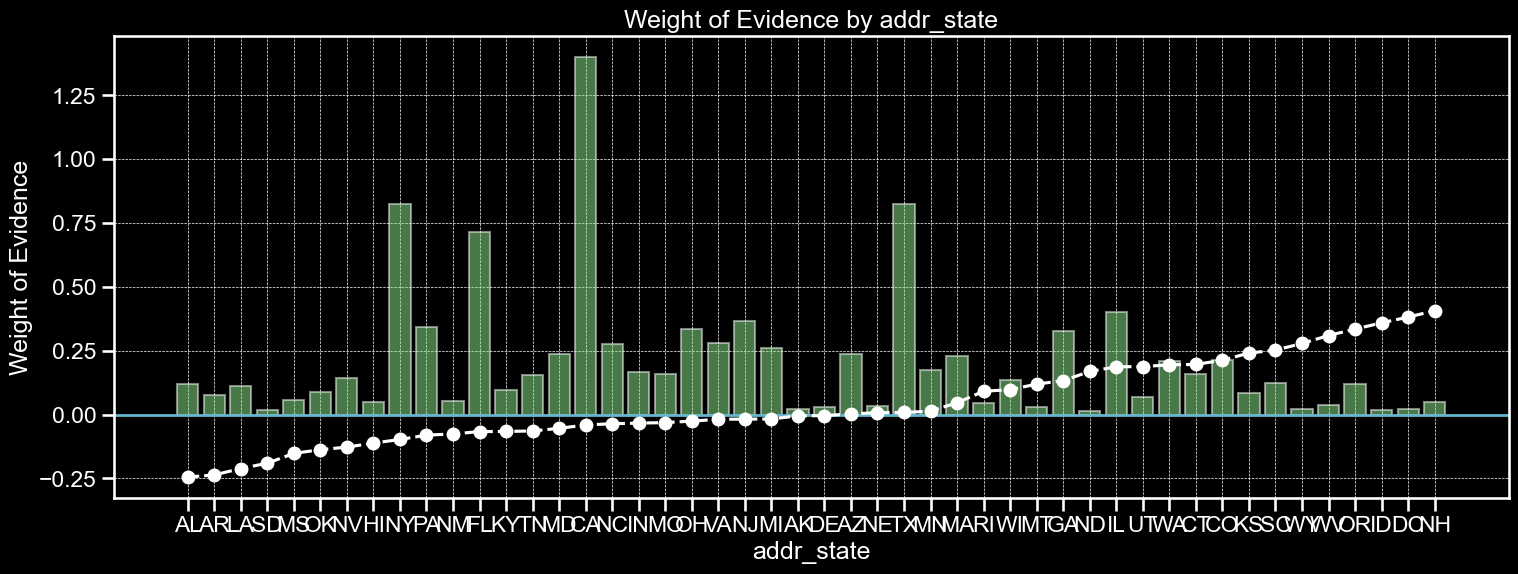

In [87]:
plot_by_woe(df_temp.iloc[1:-2, :])

In [88]:
# AI
# AL_AR_MS_OK_LA

# DC_ID
# VT_ME

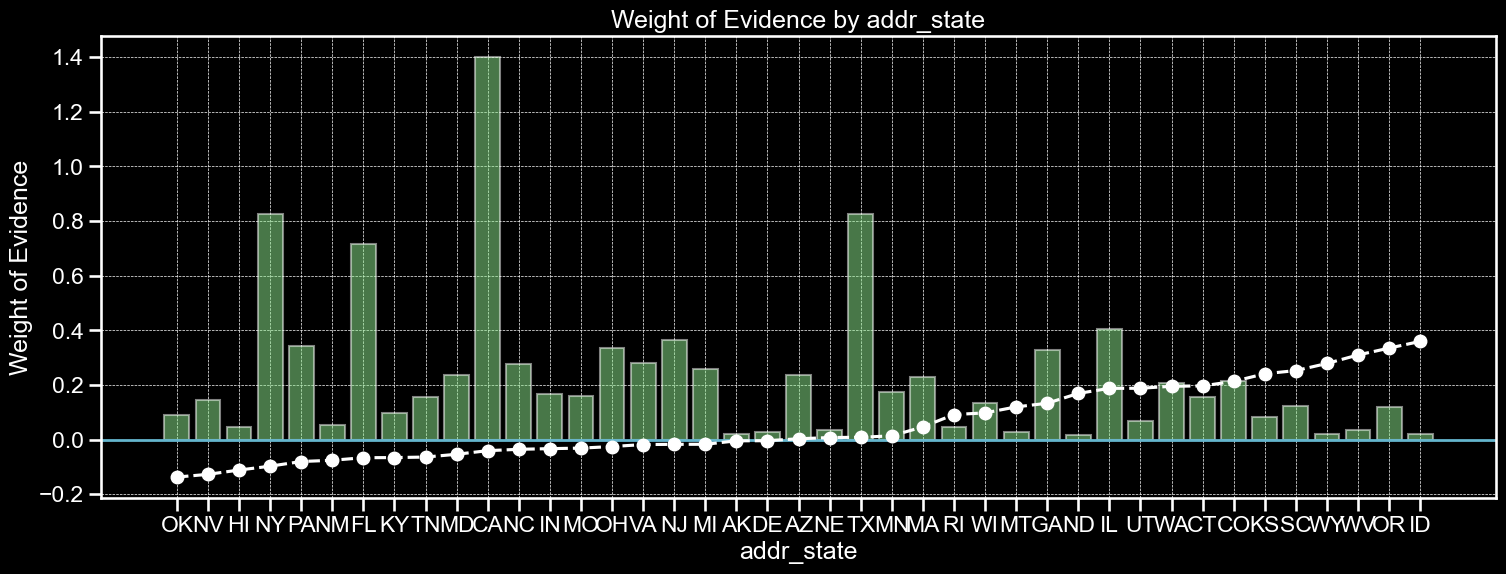

In [89]:
plot_by_woe(df_temp.iloc[6:-4, :])

In [90]:
# AI
# AL_AR_MS_OK_LA
# NV_NM_HI
# NY
# SD
# FL
# MO_MD_NC_PA_KY_TN
# CA
# NJ_MI_IN_VA_MN_AK_AZ_NE_OH
# TX
# DE_MA_UT
# WI_GA
# RI_WY_IL
# MT_KS
# CT_ND_WA_CO_SC
# WV_OR_NH
# DC_ID
# VT_ME

In [91]:
dummies['addr_state:AL_AR_MS_OK_LA'] = sum([loan_data_row_dummies['addr_state:AL'],
                                           loan_data_row_dummies['addr_state:AR'],
                                           loan_data_row_dummies['addr_state:MS'],
                                           loan_data_row_dummies['addr_state:OK'],
                                           loan_data_row_dummies['addr_state:LA']])

dummies['addr_state:NV_NM_HI'] = sum([loan_data_row_dummies['addr_state:NV'],
                                           loan_data_row_dummies['addr_state:NM'],
                                           loan_data_row_dummies['addr_state:HI']])

dummies['addr_state:MO_MD_NC_PA_KY_TN'] = sum([loan_data_row_dummies['addr_state:MO'],
                                           loan_data_row_dummies['addr_state:MD'],
                                           loan_data_row_dummies['addr_state:NC'],
                                           loan_data_row_dummies['addr_state:PA'],
                                           loan_data_row_dummies['addr_state:KY'],
                                           loan_data_row_dummies['addr_state:TN']])

dummies['addr_state:NJ_MI_IN_VA_MN_AK_AZ_NE_OH'] = sum([loan_data_row_dummies['addr_state:NJ'],
                                           loan_data_row_dummies['addr_state:MI'],
                                           loan_data_row_dummies['addr_state:IN'],
                                           loan_data_row_dummies['addr_state:VA'],
                                           loan_data_row_dummies['addr_state:MN'],
                                           loan_data_row_dummies['addr_state:AK'],
                                           loan_data_row_dummies['addr_state:AZ'],
                                           loan_data_row_dummies['addr_state:NE'],
                                           loan_data_row_dummies['addr_state:OH']])

dummies['addr_state:DE_MA_UT'] = sum([loan_data_row_dummies['addr_state:DE'],
                                    loan_data_row_dummies['addr_state:MA'],
                                    loan_data_row_dummies['addr_state:UT']])

dummies['addr_state:WI_GA'] = sum([loan_data_row_dummies['addr_state:WI'],
                                    loan_data_row_dummies['addr_state:GA']])

dummies['addr_state:RI_WY_IL'] = sum([loan_data_row_dummies['addr_state:RI'],
                                    loan_data_row_dummies['addr_state:WY'],
                                    loan_data_row_dummies['addr_state:IL']])

dummies['addr_state:MT_KS'] = sum([loan_data_row_dummies['addr_state:MT'],
                                    loan_data_row_dummies['addr_state:KS']])

dummies['addr_state:CT_ND_WA_CO_SC'] = sum([loan_data_row_dummies['addr_state:CT'],
                                           loan_data_row_dummies['addr_state:ND'],
                                           loan_data_row_dummies['addr_state:WA'],
                                           loan_data_row_dummies['addr_state:CO'],
                                           loan_data_row_dummies['addr_state:SC']])

dummies['addr_state:WV_OR_NH'] = sum([loan_data_row_dummies['addr_state:WV'],
                                    loan_data_row_dummies['addr_state:OR'],
                                    loan_data_row_dummies['addr_state:NH']])

dummies['addr_state:DC_ID'] = sum([loan_data_row_dummies['addr_state:DC'],
                                    loan_data_row_dummies['addr_state:ID']])

dummies['addr_state:VT_ME'] = sum([loan_data_row_dummies['addr_state:VT'],
                                    loan_data_row_dummies['addr_state:ME']])

dummies = pd.concat([dummies, 
                     loan_data_row_dummies[['addr_state:IA',
                                            'addr_state:NY',
                                            'addr_state:SD',
                                            'addr_state:FL',
                                            'addr_state:CA',
                                            'addr_state:TX']]], 
                     axis=1)

ref_categorie.append('addr_state:IA')

V: verification_status

In [92]:
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [93]:
df_inputs_prepr['verification_status'].notnull().value_counts()

verification_status
True    565167
Name: count, dtype: int64

In [94]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
st(df_temp)

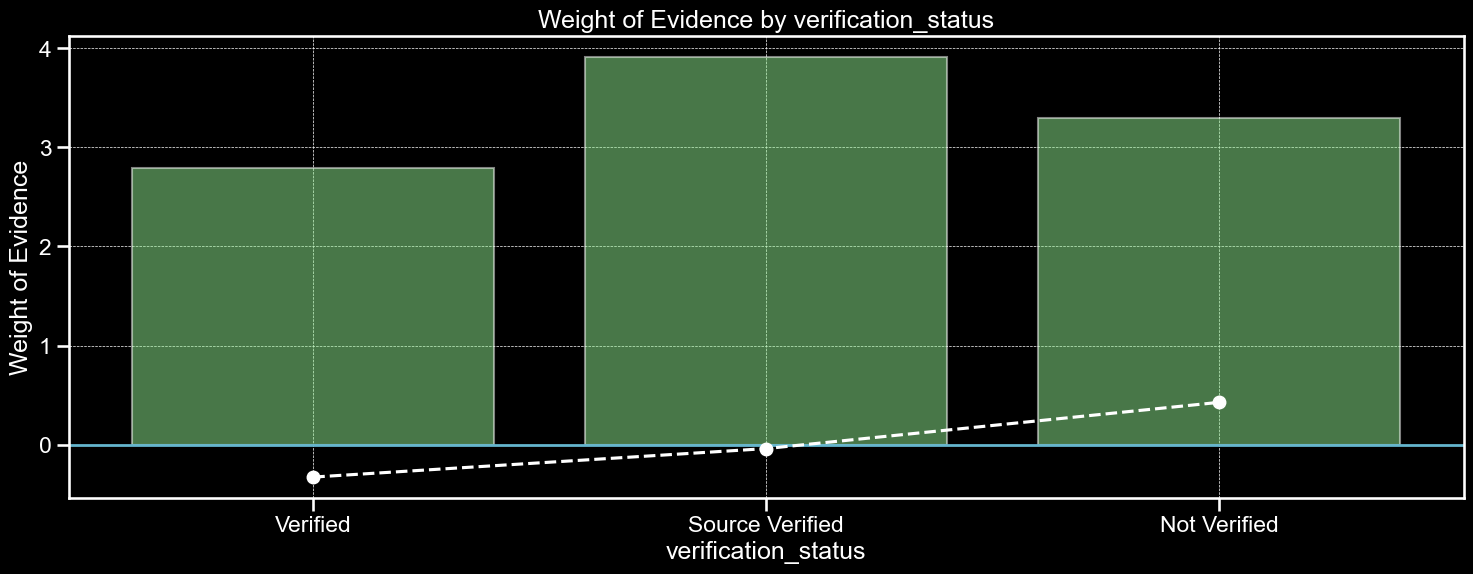

In [95]:
plot_by_woe(df_temp)

In [96]:
dummies = pd.concat([dummies, pd.get_dummies(df_inputs_prepr['verification_status'], 
                          prefix='verification_status', 
                          prefix_sep=':', 
                          dtype='int')], axis=1)

ref_categorie.append('verification_status:Verified')

V: purpose

In [97]:
df_inputs_prepr['purpose'].unique()

array(['other', 'home_improvement', 'credit_card', 'debt_consolidation',
       'vacation', 'medical', 'small_business', 'moving',
       'major_purchase', 'house', 'car', 'wedding', 'renewable_energy',
       'educational'], dtype=object)

In [98]:
df_inputs_prepr['purpose'].notnull().value_counts()

purpose
True    565167
Name: count, dtype: int64

In [99]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
st(df_temp)

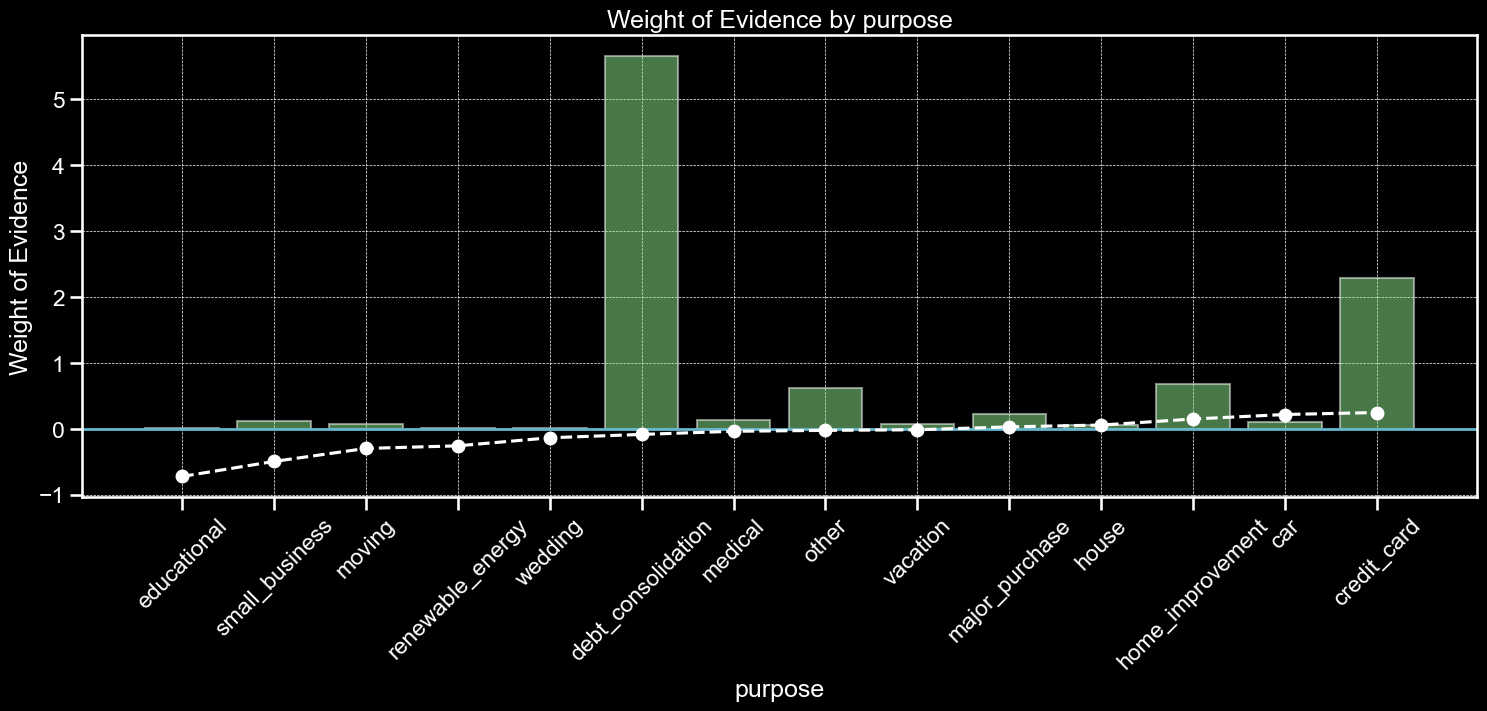

In [100]:
plot_by_woe(df_temp, 45)

In [101]:
dummies['purpose:educational__small_business__renewable_energy__moving'] = sum([loan_data_row_dummies['purpose:educational'],
                                                                               loan_data_row_dummies['purpose:renewable_energy'], 
                                                                               loan_data_row_dummies['purpose:small_business'],
                                                                               loan_data_row_dummies['purpose:moving']])

dummies = pd.concat([dummies, 
                     loan_data_row_dummies['purpose:debt_consolidation']], 
                     axis=1)

dummies['purpose:medical_wedding_other_house_vacation_major_purchase'] = sum([loan_data_row_dummies['purpose:wedding'],
                                                                              loan_data_row_dummies['purpose:other'],
                                                                              loan_data_row_dummies['purpose:house'], 
                                                                              loan_data_row_dummies['purpose:vacation'],
                                                                              loan_data_row_dummies['purpose:major_purchase']])

dummies = pd.concat([dummies,
                     loan_data_row_dummies[['purpose:home_improvement', 'purpose:credit_card', 'purpose:car']]],
                    axis=1)

ref_categorie.append('purpose:educational__small_business__renewable_energy__moving')


V: initial_list_status

In [102]:
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [103]:
df_inputs_prepr['initial_list_status'].notnull().value_counts()

initial_list_status
True    565167
Name: count, dtype: int64

In [104]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
st(df_temp)

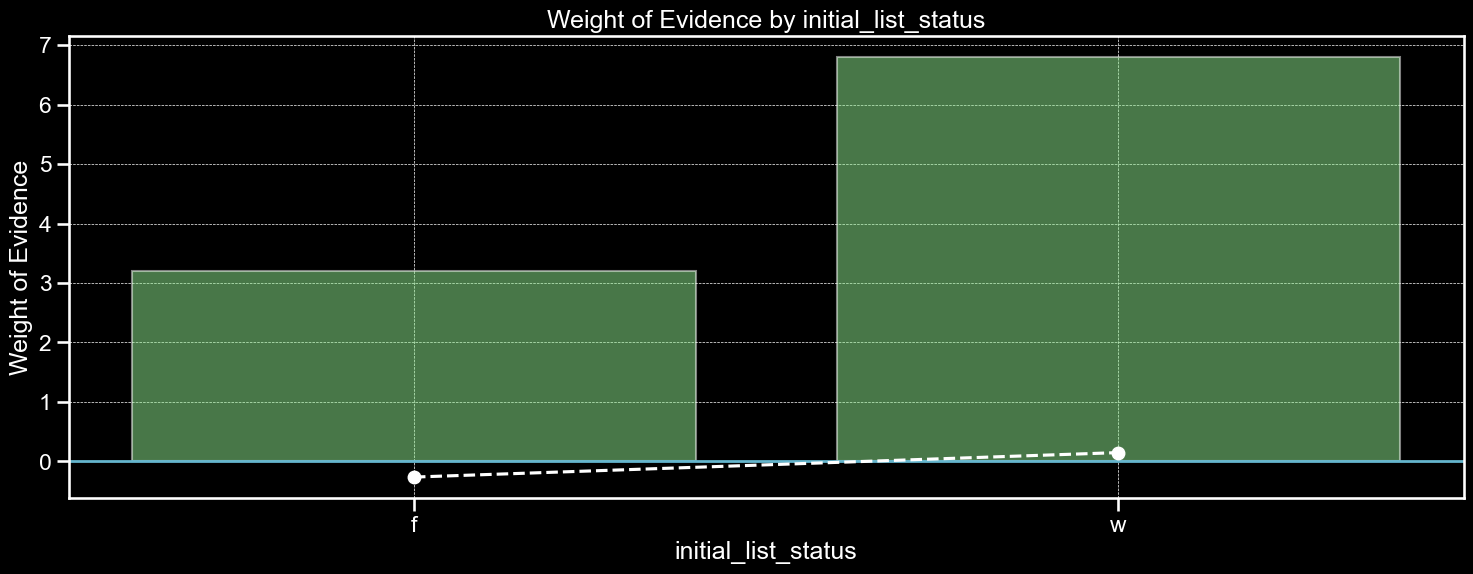

In [105]:
plot_by_woe(df_temp)

In [106]:
dummies = pd.concat([dummies,
                     pd.get_dummies(df_inputs_prepr['initial_list_status'], 
                                    prefix='initial_list_status', 
                                    prefix_sep=':', 
                                    dtype='int')],
                    axis=1)

ref_categorie.append('initial_list_status:f')

Preprocessing Countinuos Variables: Automatimg Calculations and Visualization Results

In [107]:
def woe_ordered_continuous(df, discrete_vatiable_name, good_bad_vatriable_df):
    df = pd.concat([df[discrete_vatiable_name], good_bad_vatriable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
                    axis=1)
    df = df.iloc[ :, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # The proportion of observations that fals in each subcategory
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['n_obs'] * df['prop_good']
    df['n_bad'] = df['n_obs'] * (1 - df['prop_good'])
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()

    return df

V: term_int

In [108]:
df_inputs_prepr['term_int'].value_counts()

term_int
36    402620
60    162547
Name: count, dtype: int64

In [109]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
st(df_temp)

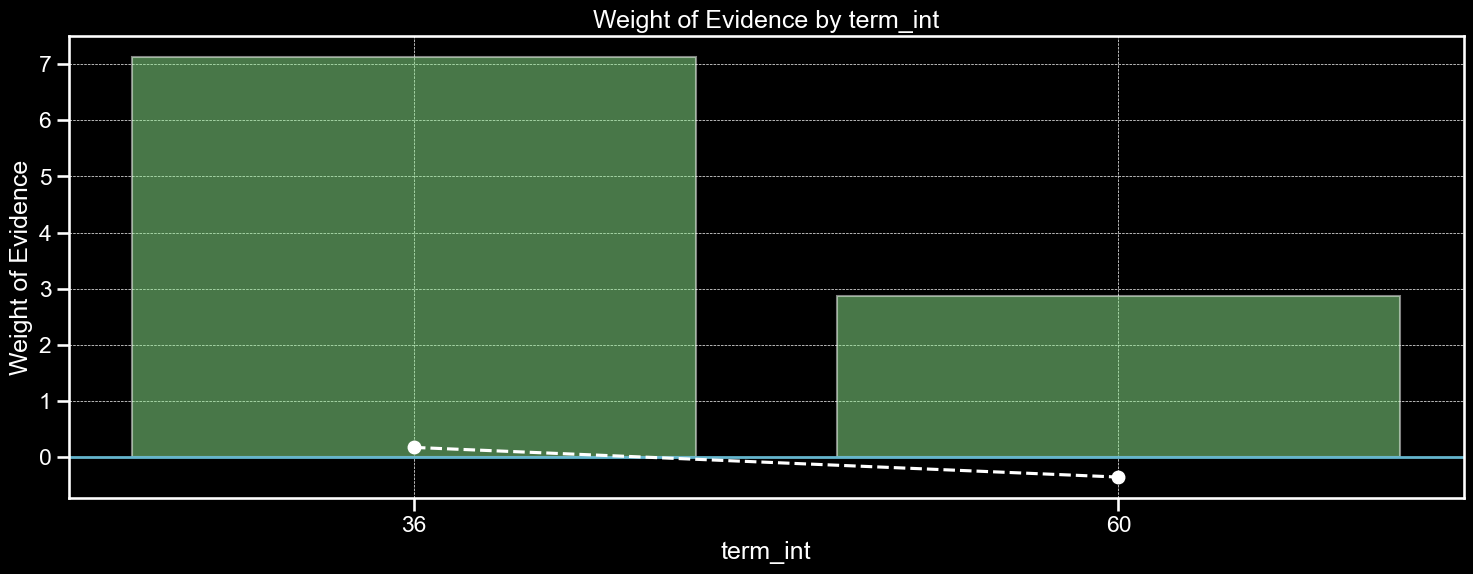

In [110]:
plot_by_woe(df_temp)

In [111]:
dummies['term_int:36'] = np.where(df_inputs_prepr['term_int'] == 36, 1, 0)
dummies['term_int:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

ref_categorie.append('term_int:60')

V: emp_length_int

In [112]:
df_inputs_prepr['emp_length_int'].unique()

array([ 8., 10.,  5.,  1.,  2.,  0.,  7.,  4.,  9.,  3.,  6.])

In [113]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
st(df_temp)

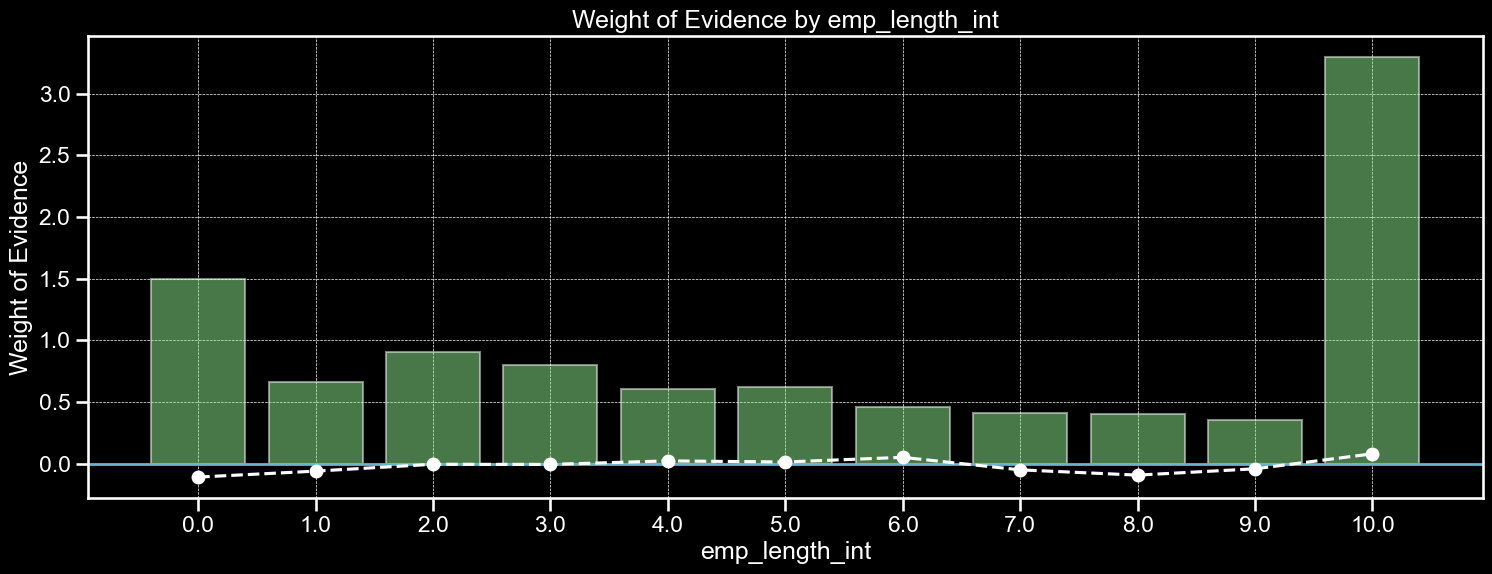

In [114]:
plot_by_woe(df_temp)

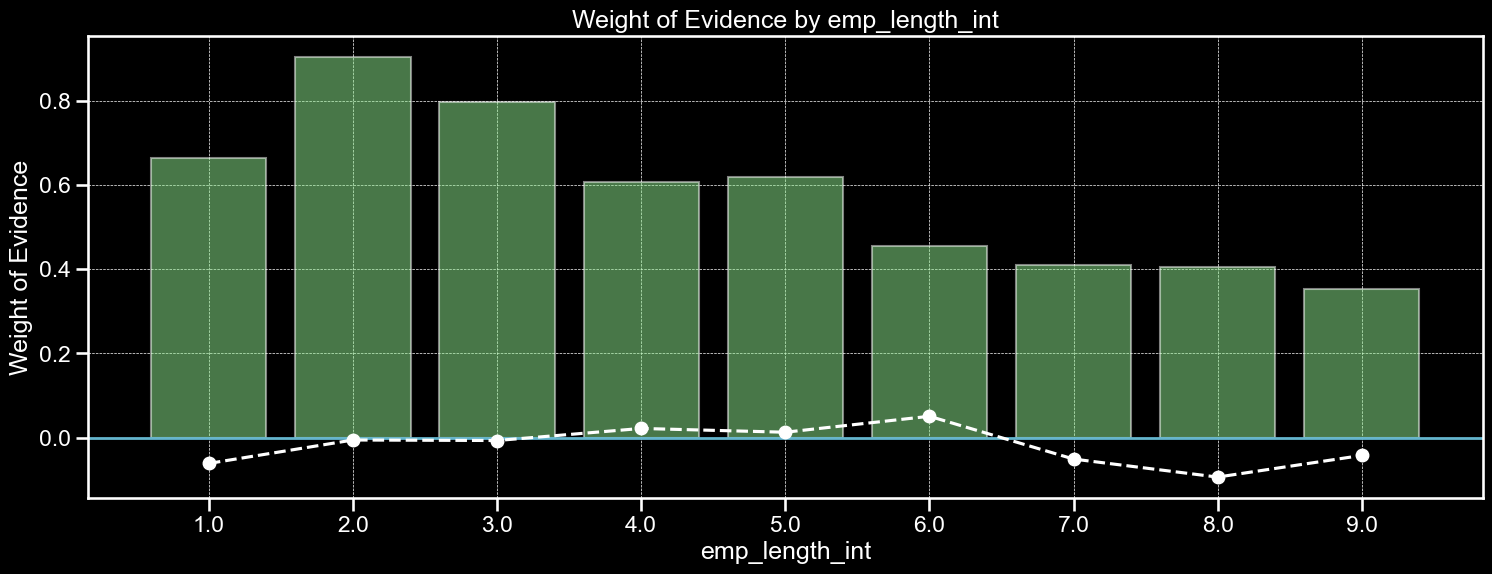

In [115]:
plot_by_woe(df_temp.iloc[1:-1, :])

In [116]:
dummies['emp_length_int:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
dummies['emp_length_int:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
dummies['emp_length_int:2-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 7)), 1, 0)
dummies['emp_length_int:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
dummies['emp_length_int:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

ref_categorie.append('emp_length_int:0')

V: mths_since_issue_date

In [117]:
df_inputs_prepr['mths_since_issue_date'].unique()

array([ 46.,  51., 113.,  73.,  43.,  92.,  37.,  71.,  63.,  84.,  61.,
        70., 100.,  65., 107., 101., 126.,  80.,  53., 102., 112.,  56.,
        48., 109.,  62.,  45.,  91.,  58.,  69.,  47.,  79.,  54.,  39.,
       115.,  78.,  87.,  68.,  59.,  55., 108.,  90.,  42.,  44., 111.,
        41.,  57.,  49.,  81., 104., 120.,  94.,  77.,  82.,  38.,  75.,
        50.,  60., 105.,  83.,  66.,  97.,  96.,  76., 121.,  88.,  67.,
        89.,  64.,  74.,  40.,  99.,  95.,  93.,  86., 168.,  72., 130.,
       106.,  52., 123., 127.,  85., 114., 150., 116., 110.,  98., 128.,
       137., 119., 161., 136., 153., 147., 165., 149., 124., 131., 129.,
       118., 117., 148., 158., 156., 157., 139., 155., 134., 125., 170.,
       141., 138., 151., 135., 122., 133., 145., 140., 146., 142., 132.,
       167., 152., 174., 163., 176., 143., 144., 160., 154., 166., 159.,
       164., 177., 172., 162., 169., 175., 171.])

In [118]:
df_inputs_prepr['mths_since_issue_date'].describe()

count   565167.000000
mean        68.011612
std         21.734141
min         37.000000
25%         50.000000
50%         66.000000
75%         81.000000
max        177.000000
Name: mths_since_issue_date, dtype: float64

In [119]:
df_inputs_prepr['mths_since_issue_date_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_date'].to_numpy(), 50)

In [120]:
df_inputs_prepr['mths_since_issue_date_factor'].head()

0      (45.4, 48.2]
1      (48.2, 51.0]
2    (112.6, 115.4]
3      (70.6, 73.4]
4      (42.6, 45.4]
Name: mths_since_issue_date_factor, dtype: category
Categories (50, interval[float64, right]): [(36.86, 39.8] < (39.8, 42.6] < (42.6, 45.4] < (45.4, 48.2] ... (165.8, 168.6] < (168.6, 171.4] < (171.4, 174.2] < (174.2, 177.0]]

In [121]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_date_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


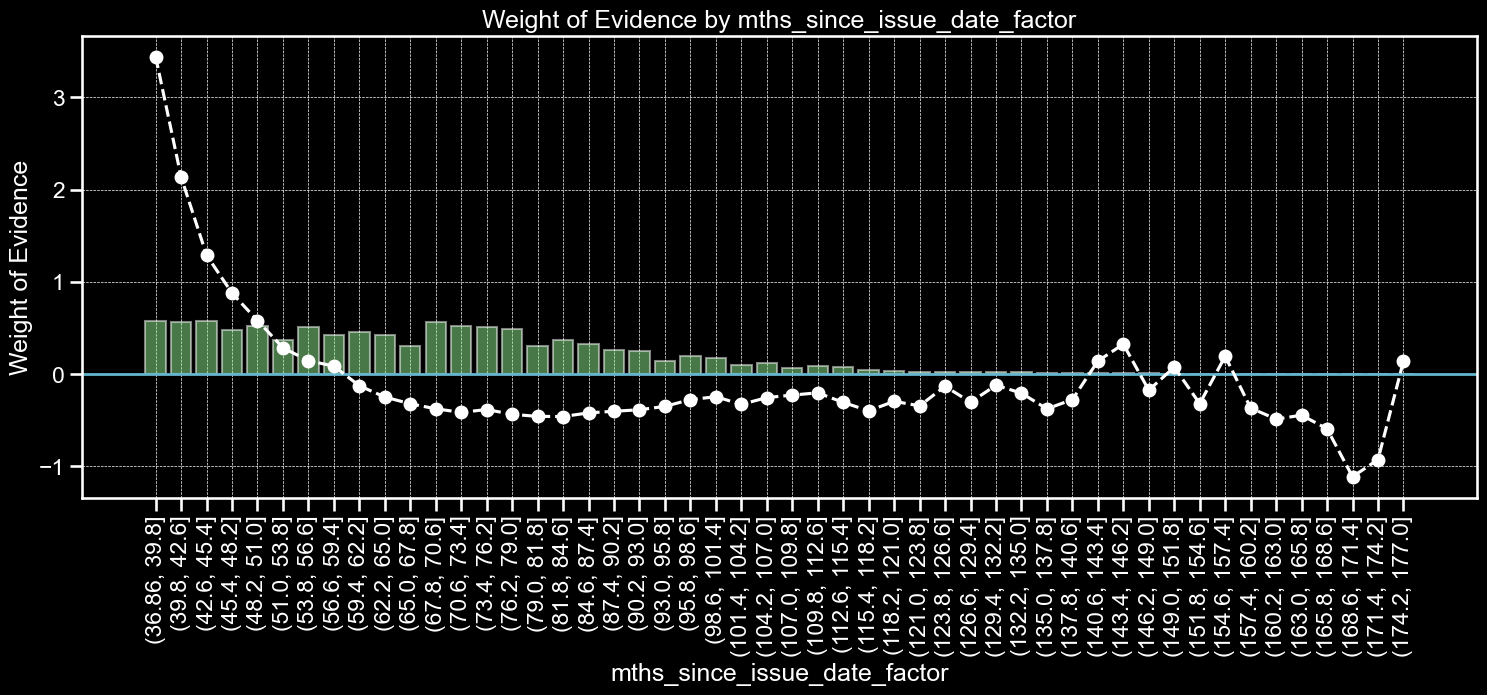

In [122]:
plot_by_woe(df_temp, 90)

In [123]:
# Firt 6 are in their own categories
df_temp.iloc[:6, 0]
# I <38

0    (36.86, 39.8]
1     (39.8, 42.6]
2     (42.6, 45.4]
3     (45.4, 48.2]
4     (48.2, 51.0]
5     (51.0, 53.8]
Name: mths_since_issue_date_factor, dtype: category
Categories (50, interval[float64, right]): [(36.86, 39.8] < (39.8, 42.6] < (42.6, 45.4] < (45.4, 48.2] ... (165.8, 168.6] < (168.6, 171.4] < (171.4, 174.2] < (174.2, 177.0]]

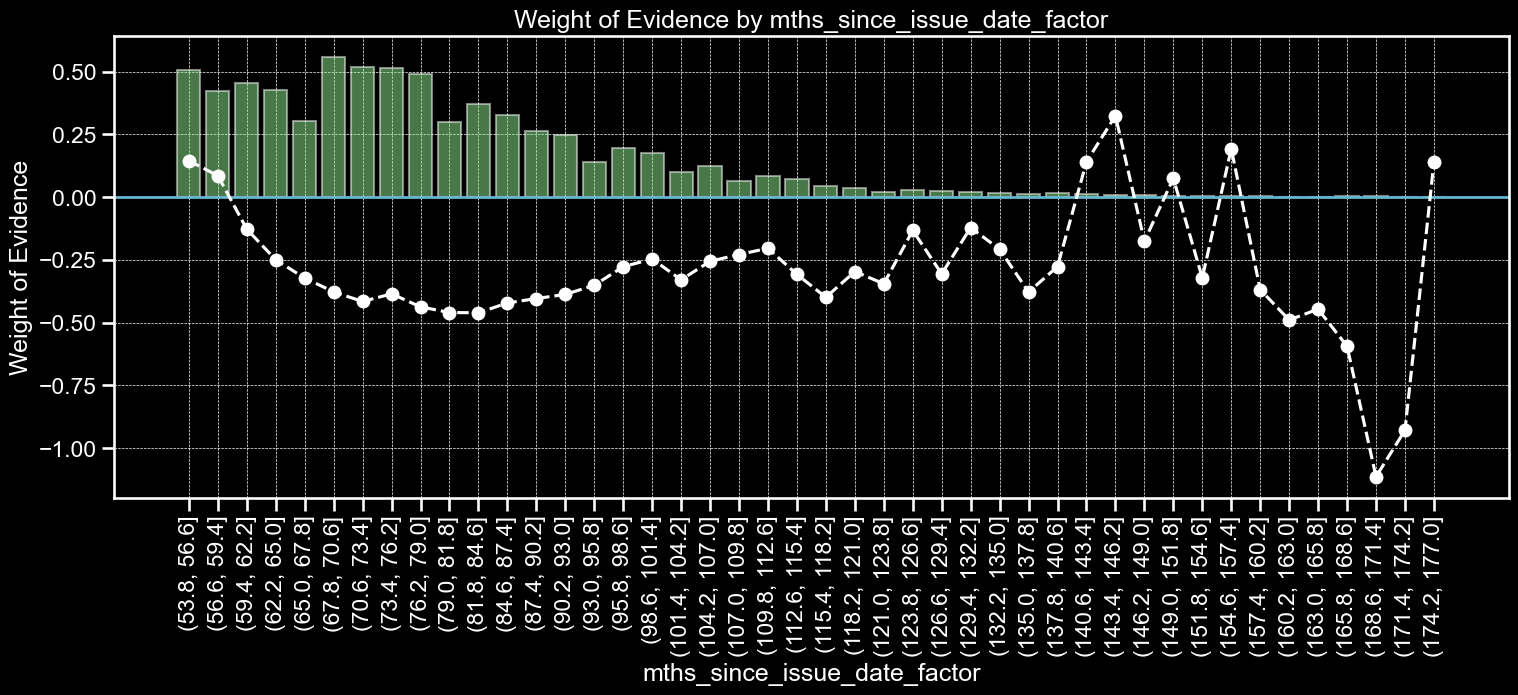

In [124]:
plot_by_woe(df_temp.iloc[6:, :], 90)

In [125]:
dummies['mths_since_issue_date:<40'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(40)), 1, 0)
dummies['mths_since_issue_date:40-43'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(40, 44)), 1, 0)
dummies['mths_since_issue_date:44-45'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(44, 46)), 1, 0)
dummies['mths_since_issue_date:46-48'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(46, 49)), 1, 0)
dummies['mths_since_issue_date:47-51'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(49, 52)), 1, 0)
dummies['mths_since_issue_date:52-55'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(52, 55)), 1, 0)
dummies['mths_since_issue_date:55-59'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(55, 60)), 1, 0)
dummies['mths_since_issue_date:60-65'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(60, 66)), 1, 0)
dummies['mths_since_issue_date:66-76'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(66, 77)), 1, 0)
dummies['mths_since_issue_date:77-96'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(77, 97)), 1, 0)
dummies['mths_since_issue_date:97-113'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(97, 114)), 1, 0)
dummies['mths_since_issue_date:114-135'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(114, 136)), 1, 0)
dummies['mths_since_issue_date:>136'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(136, int(df_inputs_prepr['mths_since_issue_date'].max()))), 1, 0)

ref_categorie.append('mths_since_issue_date:>136')

V: int_rate

In [126]:
df_inputs_prepr['int_rate'].describe()

count   565167.000000
mean        13.088320
std          4.826320
min          5.310000
25%          9.490000
50%         12.620000
75%         15.990000
max         30.990000
Name: int_rate, dtype: float64

In [127]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'].to_numpy(), 50)

In [128]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


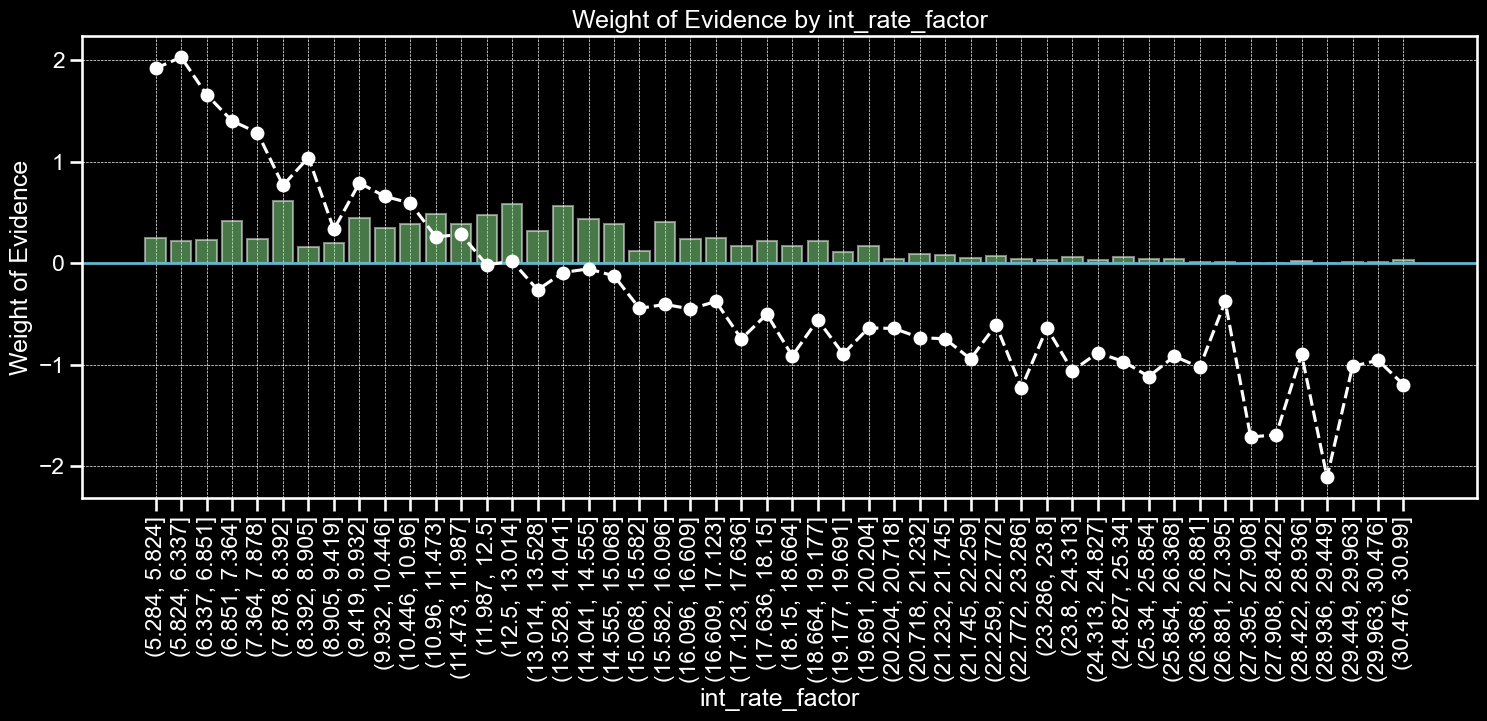

In [129]:
plot_by_woe(df_temp, 90)

In [130]:
dummies['int_rate:<8.392'] = np.where((df_inputs_prepr['int_rate'] <= 8.392), 1, 0)
dummies['int_rate:8.392-11.987'] = np.where(((df_inputs_prepr['int_rate'] > 8.392) & (df_inputs_prepr['int_rate'] <= 11.987)), 1, 0)
dummies['int_rate:11.987-15.068'] = np.where(((df_inputs_prepr['int_rate'] > 11.987) & (df_inputs_prepr['int_rate'] <= 15.068)), 1, 0)
dummies['int_rate:15.068-22.772'] = np.where(((df_inputs_prepr['int_rate'] > 15.068) & (df_inputs_prepr['int_rate'] <= 22.772)), 1, 0)
dummies['int_rate:>22.772'] = np.where((df_inputs_prepr['int_rate'] > 22.772), 1, 0)

ref_categorie.append('int_rate:>22.772')

V: funded_amnt

In [131]:
df_inputs_prepr['funded_amnt'].describe()

count   565167.000000
mean     15039.629481
std       9183.503603
min        500.000000
25%       8000.000000
50%      12800.000000
75%      20000.000000
max      40000.000000
Name: funded_amnt, dtype: float64

In [132]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'].to_numpy(), 50)

In [133]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


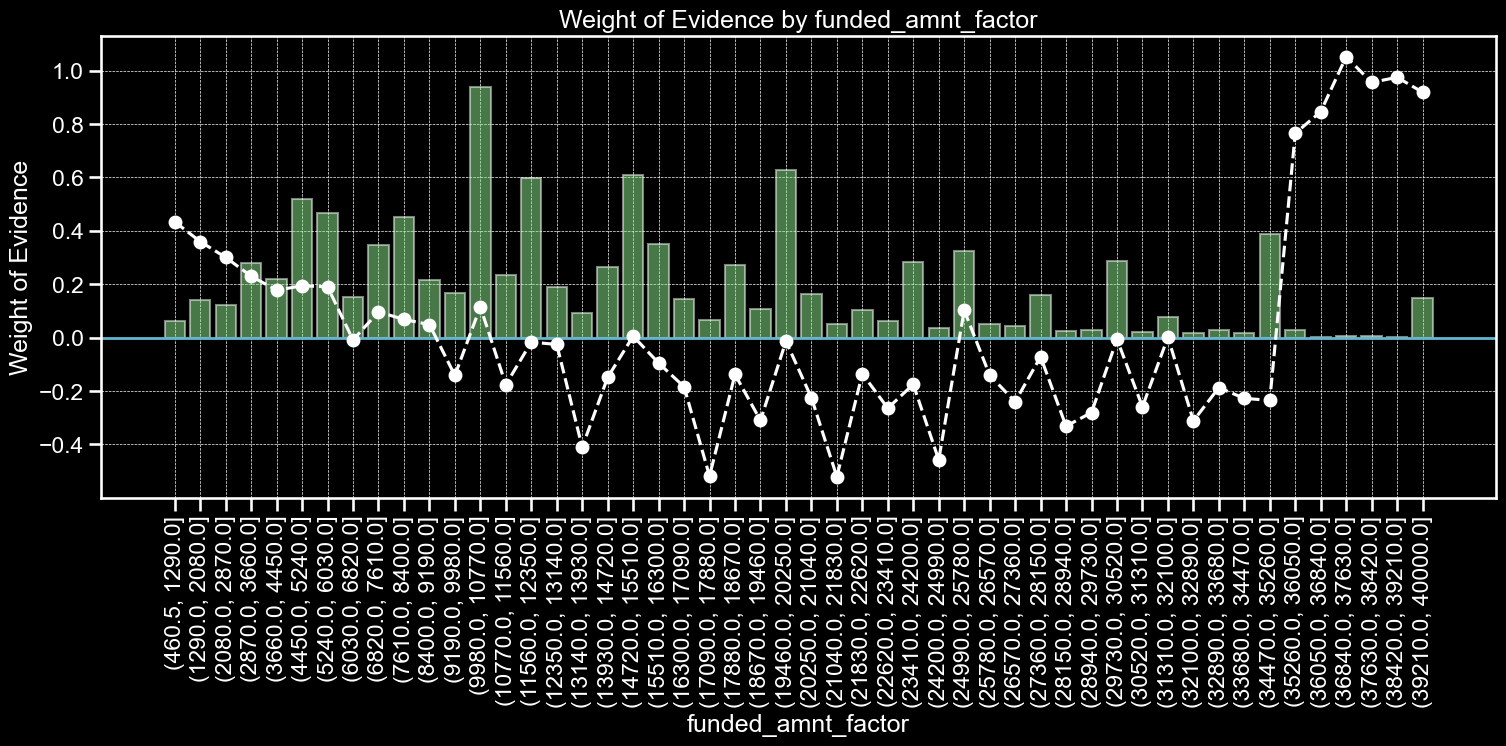

In [134]:
plot_by_woe(df_temp, 90)
# There seems to be no association whatsoever between 'funded amount' and WoE

V: mths_since_earliest_cr_line

In [135]:
df_inputs_prepr['mths_since_earliest_cr_line'].describe()

count   565167.000000
mean       218.723892
std         95.438447
min          0.000000
25%        153.000000
50%        202.000000
75%        269.000000
max       1019.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [136]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

In [137]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


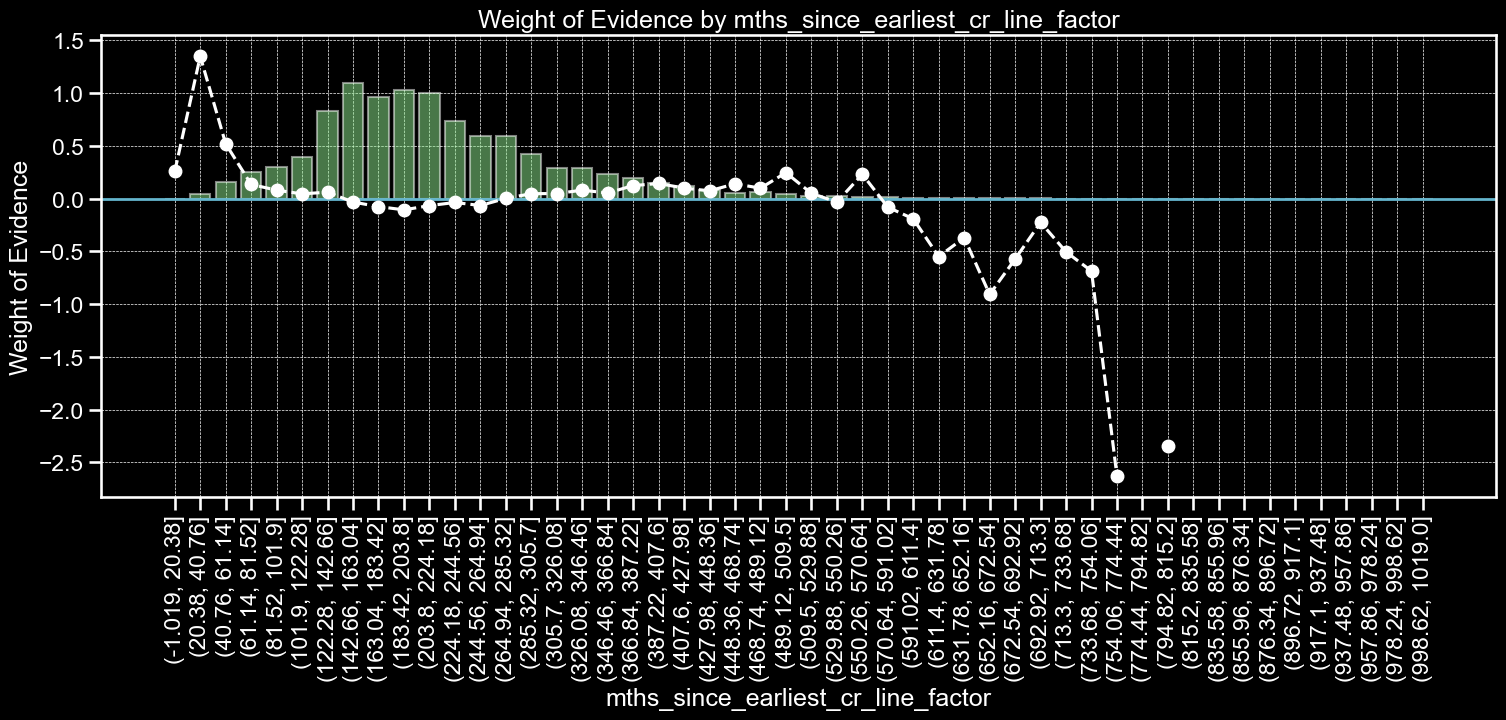

In [138]:
plot_by_woe(df_temp, 90)

In [139]:
# <=21
# 22-41
# 42-62
# 63


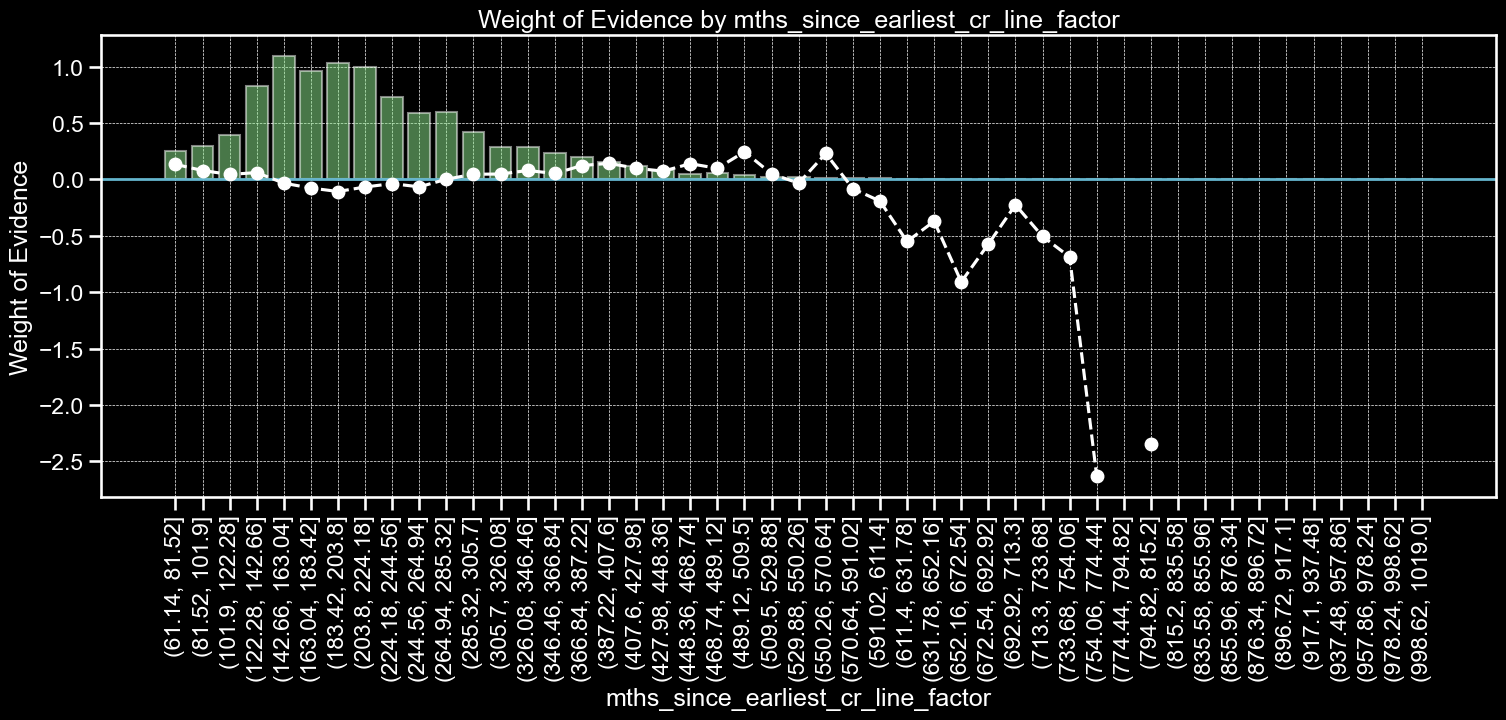

In [140]:
plot_by_woe(df_temp.iloc[3:, :], 90)

In [141]:
dummies['mths_since_earliest_cr_line:<22'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(22)), 1, 0)
dummies['mths_since_earliest_cr_line:22-41'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(22, 42)), 1, 0)
dummies['mths_since_earliest_cr_line:42-62'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(42, 63)), 1, 0)
dummies['mths_since_earliest_cr_line:63-144'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(63, 145)), 1, 0)
dummies['mths_since_earliest_cr_line:145-310'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(145, 311)), 1, 0)
dummies['mths_since_earliest_cr_line:311-537'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(311, 538)), 1, 0)
dummies['mths_since_earliest_cr_line:>538'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(538, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

ref_categorie.append('mths_since_earliest_cr_line:>538')

V: annual_inc

In [142]:
# We consider higher income anything above 250 000
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 250000, :]

In [143]:
df_inputs_prepr['annual_inc'].notnull().value_counts()

annual_inc
True    565167
Name: count, dtype: int64

In [144]:
df_inputs_prepr_temp['annual_income_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_income_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\3169043710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_income_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed

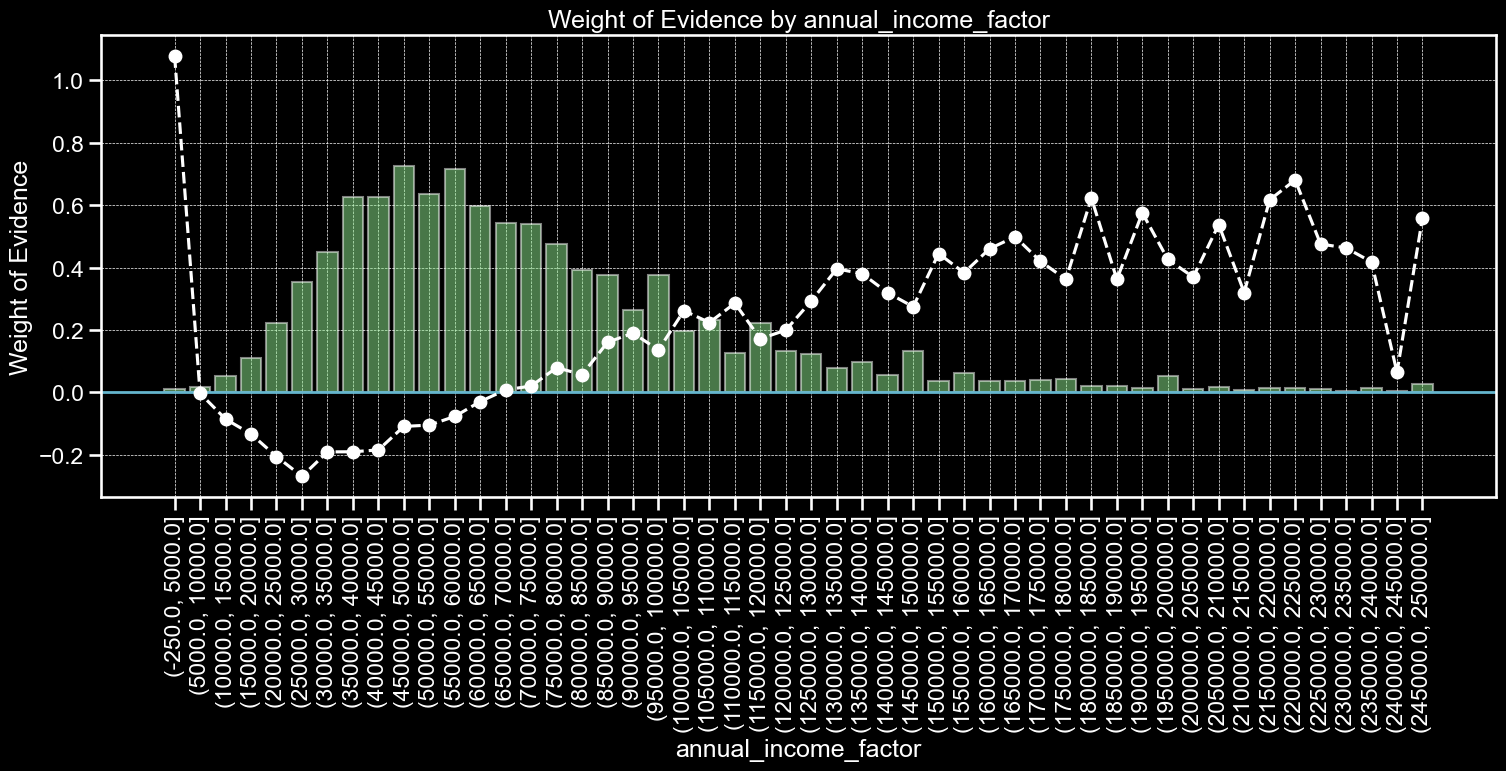

In [145]:
plot_by_woe(df_temp, 90)

In [146]:
dummies['annual_inc:<=5k'] = np.where((df_inputs_prepr['annual_inc'] <= 5000), 1, 0)
dummies['annual_inc:5k-10k'] = np.where(((df_inputs_prepr['annual_inc'] > 5000) & (df_inputs_prepr['annual_inc'] <= 10000)), 1, 0)
dummies['annual_inc:10k-30k'] = np.where(((df_inputs_prepr['annual_inc'] > 10000) & (df_inputs_prepr['annual_inc'] <= 30000)), 1, 0)
dummies['annual_inc:30k-45k'] = np.where(((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 45000)), 1, 0)
dummies['annual_inc:45k-65k'] = np.where(((df_inputs_prepr['annual_inc'] > 45000) & (df_inputs_prepr['annual_inc'] <= 65000)), 1, 0)
dummies['annual_inc:65k-85k'] = np.where(((df_inputs_prepr['annual_inc'] > 65000) & (df_inputs_prepr['annual_inc'] <= 85000)), 1, 0)
dummies['annual_inc:85k-100k'] = np.where(((df_inputs_prepr['annual_inc'] > 85000) & (df_inputs_prepr['annual_inc'] <= 100000)), 1, 0)
dummies['annual_inc:100k-125k'] = np.where(((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 125000)), 1, 0)
dummies['annual_inc:125k-160k'] = np.where(((df_inputs_prepr['annual_inc'] > 125000) & (df_inputs_prepr['annual_inc'] <= 160000)), 1, 0)
dummies['annual_inc:160k-185k'] = np.where(((df_inputs_prepr['annual_inc'] > 160000) & (df_inputs_prepr['annual_inc'] <= 185000)), 1, 0)
dummies['annual_inc:185k-200k'] = np.where(((df_inputs_prepr['annual_inc'] > 185000) & (df_inputs_prepr['annual_inc'] <= 200000)), 1, 0)
dummies['annual_inc:>200k'] = np.where((df_inputs_prepr['annual_inc'] > 200000), 1, 0)

ref_categorie.append('annual_inc:185k-200k')

V: mths_since_last_delinq

In [147]:
df_inputs_prepr['mths_since_last_delinq'].describe()

count   275796.000000
mean        34.507128
std         21.908029
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        188.000000
Name: mths_since_last_delinq, dtype: float64

In [148]:
pd.notnull(df_inputs_prepr['mths_since_last_delinq']).value_counts()

mths_since_last_delinq
False    289371
True     275796
Name: count, dtype: int64

In [149]:

print(f"""For mths_since_last_delinq are {df_inputs_prepr['mths_since_last_delinq'].isnull().sum()} null values.
Are more null values from the total, by a factor of {df_inputs_prepr['mths_since_last_delinq'].isnull().sum() / df_inputs_prepr['mths_since_last_delinq'].isnull().count()}""")

For mths_since_last_delinq are 289371 null values.
Are more null values from the total, by a factor of 0.5120097245592895


In [150]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\2459205453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


In [151]:
df_temp =  woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


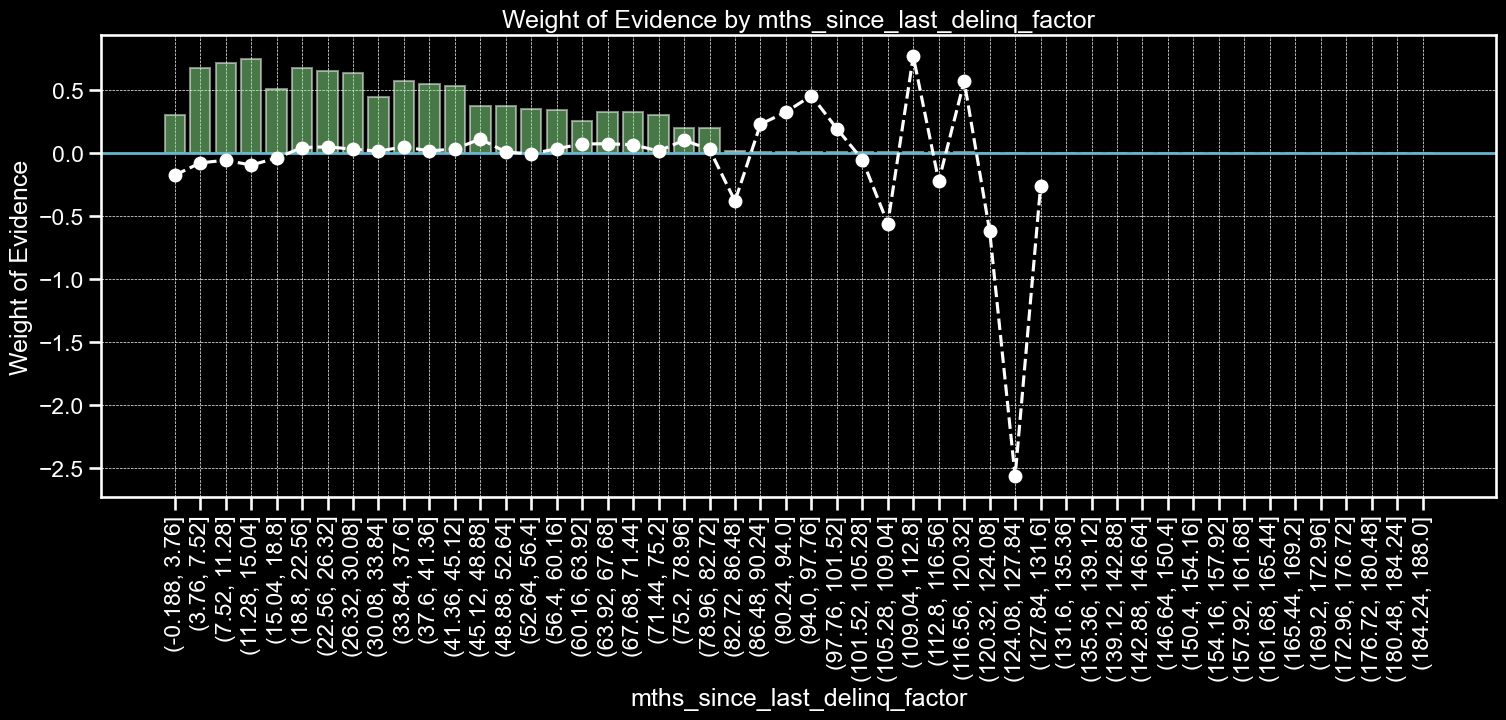

In [152]:
plot_by_woe(df_temp, 90)

In [153]:
dummies['mths_since_last_delinq:Missing'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(), 1, 0)
dummies['mths_since_last_delinq:0-4'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(5)), 1, 0)
dummies['mths_since_last_delinq:5-19'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(5, 20)), 1, 0)
dummies['mths_since_last_delinq:20-85'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(20, 86)), 1, 0)
dummies['mths_since_last_delinq:>86'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(86, int(df_inputs_prepr['mths_since_last_delinq'].max()))), 1, 0)

ref_categorie.append('mths_since_last_delinq:Missing')

V: dti = dept to income ratio

In [154]:
df_inputs_prepr['dti'].describe()

count   564753.000000
mean        18.810939
std         13.848310
min          0.000000
25%         11.880000
50%         17.830000
75%         24.470000
max        999.000000
Name: dti, dtype: float64

In [155]:
df_inputs_prepr['dti'].notnull().value_counts()

dti
True     564753
False       414
Name: count, dtype: int64

In [156]:
df_inputs_prepr['dti'] = df_inputs_prepr['dti'].fillna(df_inputs_prepr['dti'].median())

In [157]:
df_inputs_prepr['dti'].notnull().value_counts()

dti
True    565167
Name: count, dtype: int64

In [158]:
df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0]

Series([], Name: dti, dtype: float64)

In [159]:
if (df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0].any()):
    index = df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0].index
    df_inputs_prepr.loc[index, 'dti'] = 0

In [160]:
df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0]

Series([], Name: dti, dtype: float64)

In [161]:
df_inputs_prepr['dti'].describe()


count   565167.000000
mean        18.810221
std         13.843262
min          0.000000
25%         11.880000
50%         17.830000
75%         24.470000
max        999.000000
Name: dti, dtype: float64

In [162]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 800)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


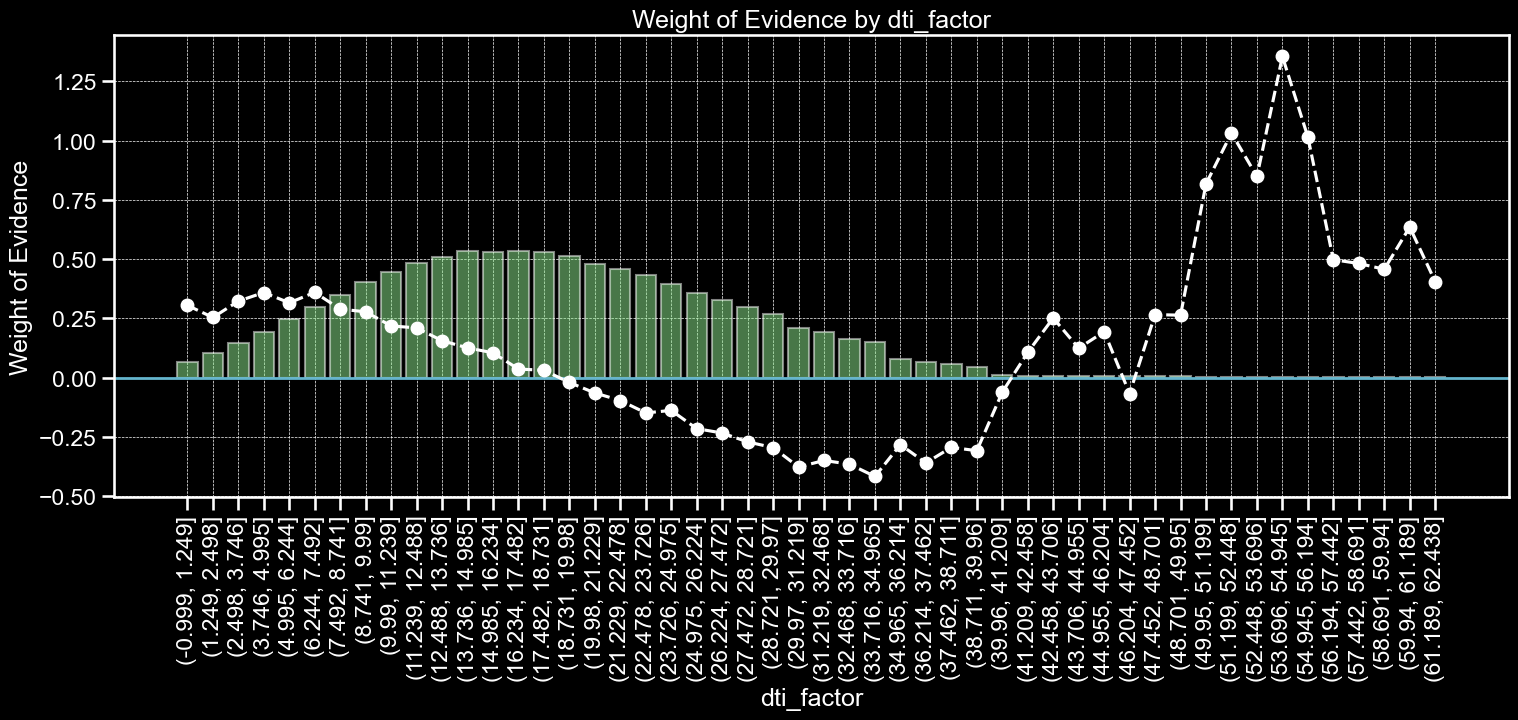

In [163]:
plot_by_woe(df_temp.iloc[:50, :], 90)

In [164]:
dummies['dti:<=2'] = np.where((df_inputs_prepr['dti'] <= 2), 1, 0)
dummies['dti:2-6'] = np.where((df_inputs_prepr['dti']) > 2 & (df_inputs_prepr['dti'] <= 6), 1, 0)
dummies['dti:6-10'] = np.where((df_inputs_prepr['dti']) > 6 & (df_inputs_prepr['dti'] <= 10), 1, 0)
dummies['dti:10-14'] = np.where((df_inputs_prepr['dti']) > 10 & (df_inputs_prepr['dti'] <= 14), 1, 0)
dummies['dti:14-19'] = np.where((df_inputs_prepr['dti']) > 14 & (df_inputs_prepr['dti'] <= 19), 1, 0)
dummies['dti:19-21'] = np.where((df_inputs_prepr['dti']) > 19 & (df_inputs_prepr['dti'] <= 21), 1, 0)
dummies['dti:21-26'] = np.where((df_inputs_prepr['dti']) > 21 & (df_inputs_prepr['dti'] <= 26), 1, 0)
dummies['dti:26-30'] = np.where((df_inputs_prepr['dti']) > 26 & (df_inputs_prepr['dti'] <= 30), 1, 0)
dummies['dti:30-35'] = np.where((df_inputs_prepr['dti']) > 30 & (df_inputs_prepr['dti'] <= 35), 1, 0)
dummies['dti:35-40'] = np.where((df_inputs_prepr['dti']) > 35 & (df_inputs_prepr['dti'] <= 40), 1, 0)
dummies['dti:40-52'] = np.where((df_inputs_prepr['dti']) > 40 & (df_inputs_prepr['dti'] <= 52), 1, 0)
dummies['dti:>52'] = np.where((df_inputs_prepr['dti'] > 52), 1, 0)

ref_categorie.append('dti:>52')

V: installment

In [165]:
df_inputs_prepr['installment'].describe()

count   565167.000000
mean       445.685967
std        266.792199
min         15.760000
25%        252.030000
50%        377.770000
75%        593.050000
max       1714.540000
Name: installment, dtype: float64

In [166]:
df_inputs_prepr['installment'].notnull().value_counts()

installment
True    565167
Name: count, dtype: int64

In [167]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'].to_numpy(), 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


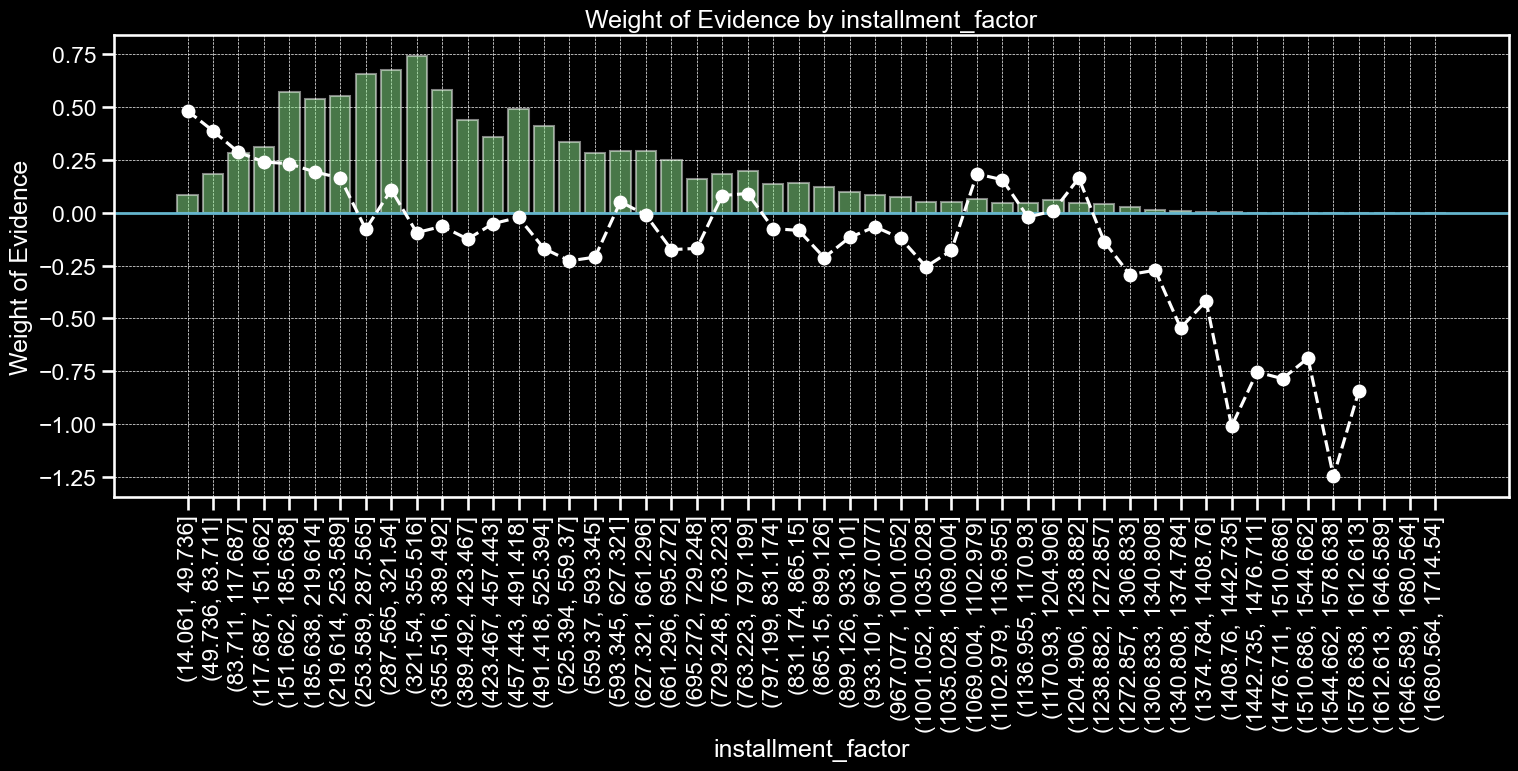

In [168]:
plot_by_woe(df_temp, 90)
# Skip this variable. There seems to be no association whatsoever between 'installment' and WoE

V: delinq_2yrs

In [169]:
df_inputs_prepr['delinq_2yrs'].describe()

count   565167.000000
mean         0.308058
std          0.868337
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         36.000000
Name: delinq_2yrs, dtype: float64

In [170]:
df_inputs_prepr['delinq_2yrs'].notnull().value_counts()

delinq_2yrs
True    565167
Name: count, dtype: int64

In [171]:
df_inputs_prepr['delinq_2yrs_factor'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [172]:
st(df_temp.iloc[:20, :])

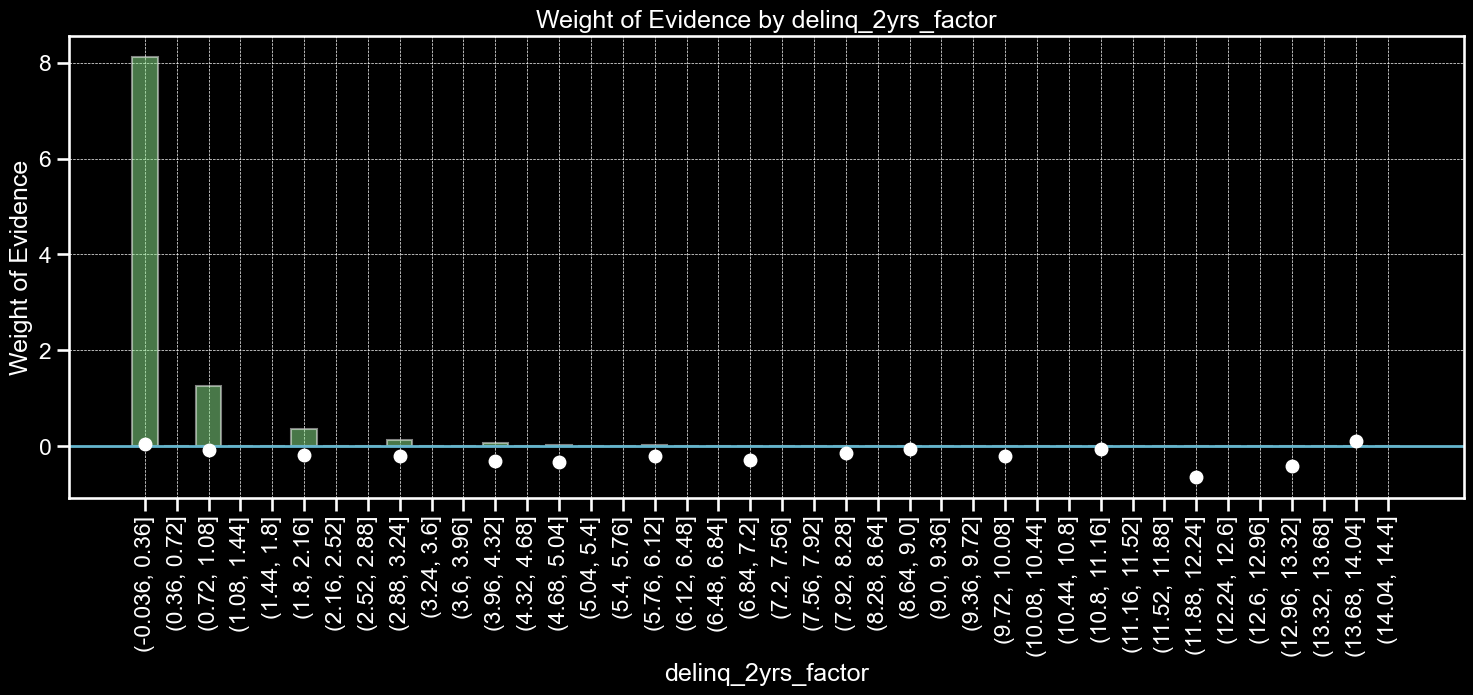

In [173]:
plot_by_woe(df_temp.iloc[ :40, :], 90)

In [174]:
dummies['delinq_2yrs:<=0.42'] = np.where((df_inputs_prepr['delinq_2yrs'] <= 0.42), 1, 0)
dummies['delinq_2yrs:0.42-0.84'] = np.where((df_inputs_prepr['delinq_2yrs'] > 0.42) & (df_inputs_prepr['delinq_2yrs'] <= 0.84), 1, 0)
dummies['delinq_2yrs:0.84-1.26'] = np.where((df_inputs_prepr['delinq_2yrs'] > 0.84) & (df_inputs_prepr['delinq_2yrs'] <= 1.26), 1, 0)
dummies['delinq_2yrs:1.26-2.1'] = np.where((df_inputs_prepr['delinq_2yrs'] > 1.26) & (df_inputs_prepr['delinq_2yrs'] <= 2.1), 1, 0)
dummies['delinq_2yrs:2.1-3.36'] = np.where((df_inputs_prepr['delinq_2yrs'] > 2.1) & (df_inputs_prepr['delinq_2yrs'] <= 3.36), 1, 0)
dummies['delinq_2yrs:>3.36'] = np.where((df_inputs_prepr['delinq_2yrs'] > 3.36), 1, 0)

ref_categorie.append('delinq_2yrs:>3.36')


V: inq_last_6mths


In [175]:
df_inputs_prepr['inq_last_6mths'].describe()

count   565167.000000
mean         0.577504
std          0.888264
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         31.000000
Name: inq_last_6mths, dtype: float64

In [176]:
df_inputs_prepr['inq_last_6mths'].notnull().value_counts()

inq_last_6mths
True    565167
Name: count, dtype: int64

In [177]:
df_inputs_prepr['inq_last_6mths_factor'] = pd.cut(df_inputs_prepr['inq_last_6mths'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


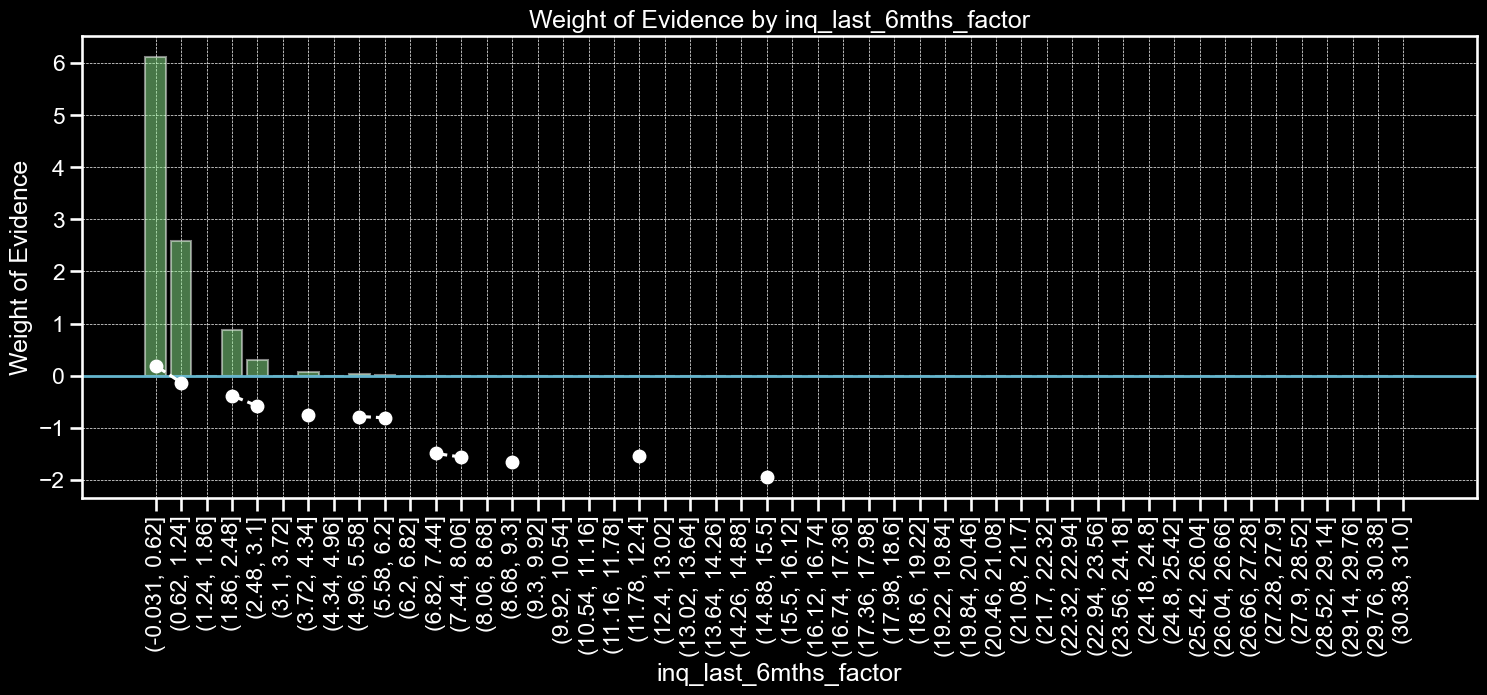

In [178]:
plot_by_woe(df_temp, 90)

In [179]:
dummies['inq_last_6mths:<=1.32'] = np.where((df_inputs_prepr['inq_last_6mths'] <= 1.32), 1, 0)
dummies['inq_last_6mths:1.32-3.3'] = np.where((df_inputs_prepr['inq_last_6mths'] > 1.32) & (df_inputs_prepr['inq_last_6mths'] <= 3.3), 1, 0)
dummies['inq_last_6mths:3.3-5.28'] = np.where((df_inputs_prepr['inq_last_6mths'] > 3.3) & (df_inputs_prepr['inq_last_6mths'] <= 5.28), 1, 0)
dummies['inq_last_6mths:>5.28'] = np.where((df_inputs_prepr['inq_last_6mths'] > 5.28), 1, 0)

ref_categorie.append('inq_last_6mths:>5.28')

V: open_acc

In [180]:
df_inputs_prepr['open_acc'].describe()

count   565167.000000
mean        11.607804
std          5.636381
min          0.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         93.000000
Name: open_acc, dtype: float64

In [181]:
df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


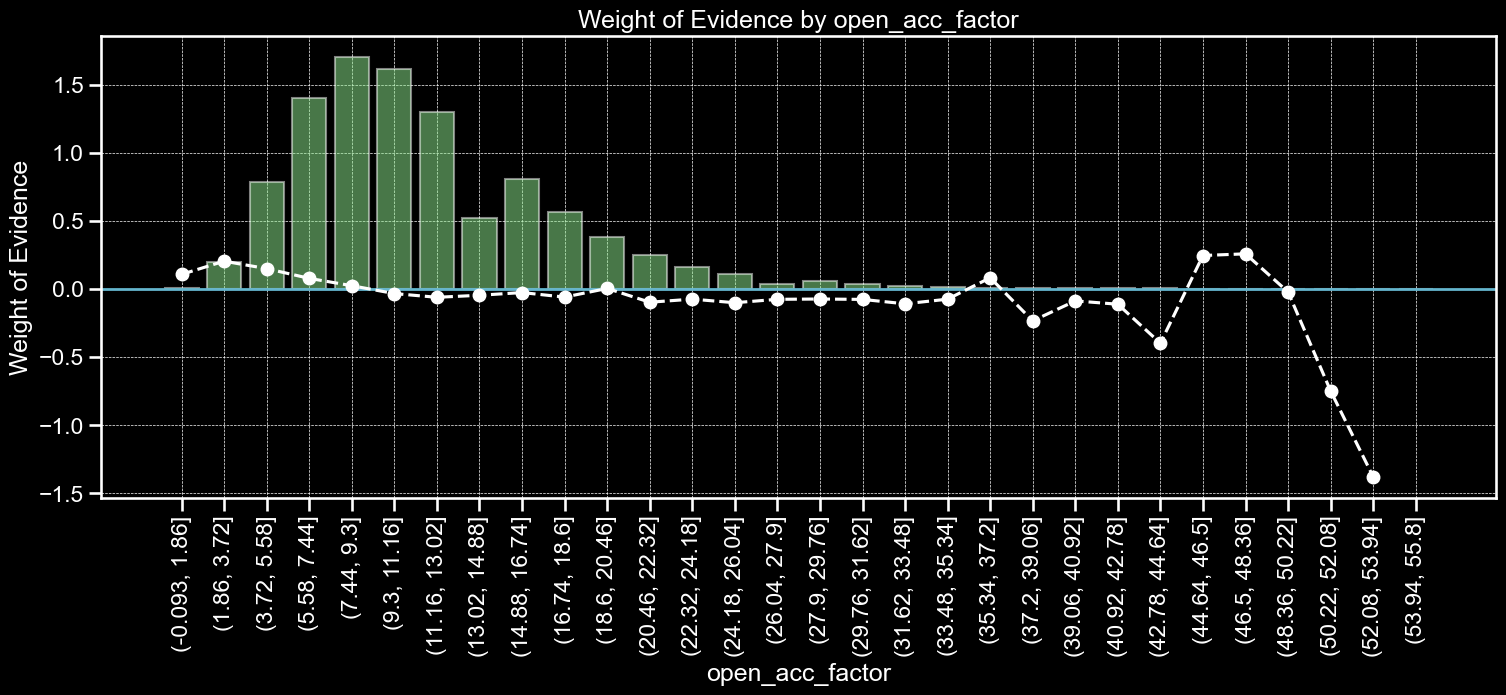

In [182]:
plot_by_woe(df_temp.iloc[:30, :], 90)

In [183]:
dummies['open_acc:<=6'] = np.where((df_inputs_prepr['open_acc'] <= 6), 1, 0)
dummies['open_acc:6-8'] = np.where((df_inputs_prepr['open_acc'] > 6) & (df_inputs_prepr['open_acc'] <= 8), 1, 0)
dummies['open_acc:8-32'] = np.where((df_inputs_prepr['open_acc'] > 8) & (df_inputs_prepr['open_acc'] <= 32), 1, 0)
dummies['open_acc:>32'] = np.where((df_inputs_prepr['open_acc'] > 32), 1, 0)

ref_categorie.append('open_acc:>32')

V: pub_rec

In [184]:
df_inputs_prepr['pub_rec'].describe()

count   565167.000000
mean         0.197274
std          0.573747
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         86.000000
Name: pub_rec, dtype: float64

In [185]:
df_inputs_prepr['pub_rec_factor'] = pd.cut(df_inputs_prepr['pub_rec'], 300)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [186]:
st(df_temp)

c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4068: RuntimeWarning: invalid value encountered in scalar divide
  -mid / (right - left) + 0.5 if mid < 0 else -left / (right - left)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4074: RuntimeWarning: invalid value encountered in scalar divide
  start, end = z_frac, (x - left) / (right - left)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4072: RuntimeWarning: invalid value encountered in scalar divide
  start, end = (x - left) / (right - left), z_frac
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4072: RuntimeWarning: invalid value encountered in scalar subtract
  start, end = (x - left) / (right - left), z_frac


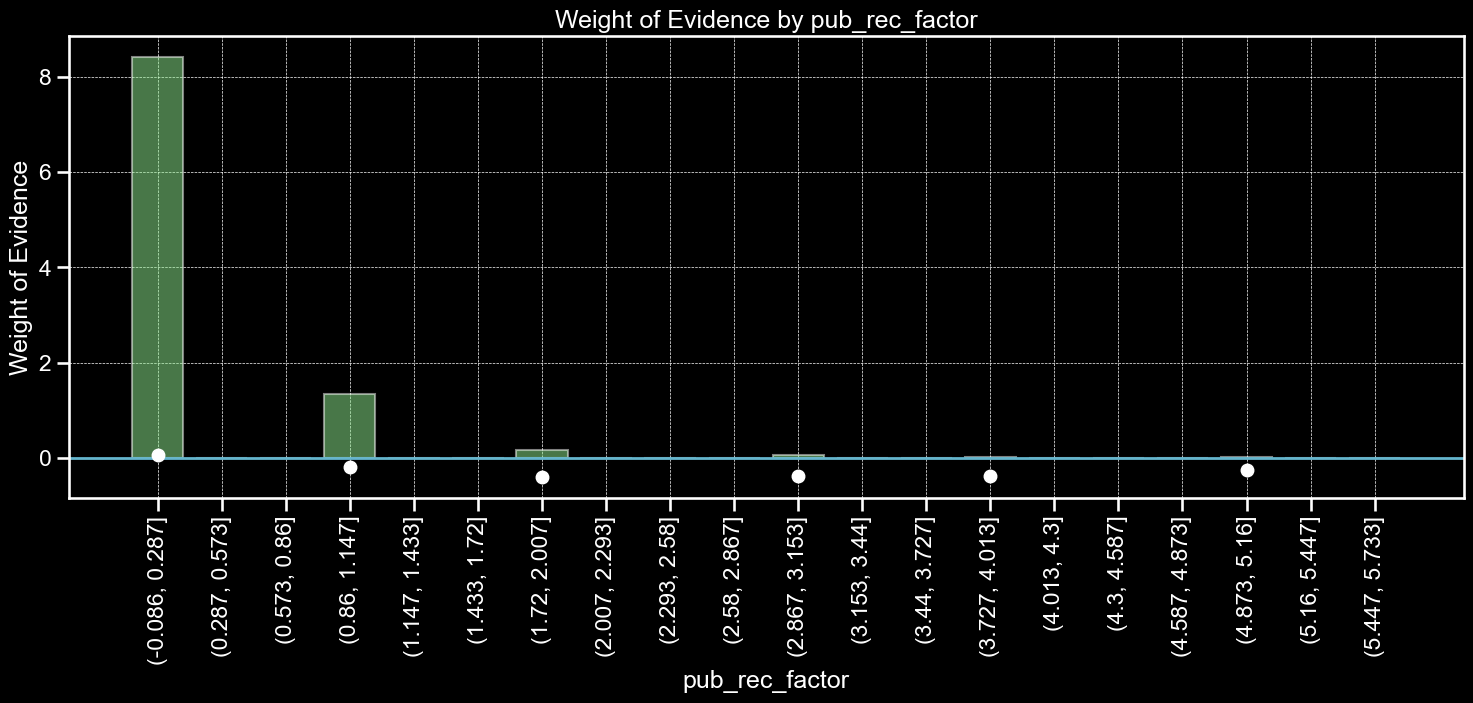

In [187]:
plot_by_woe(df_temp.iloc[:20, :], 90)

In [188]:
dummies['pub_rec:<=0.287'] = np.where((df_inputs_prepr['pub_rec'] <= 0.287), 1, 0)
dummies['pub_rec:0.287-1.147'] = np.where((df_inputs_prepr['pub_rec'] > 0.287) & (df_inputs_prepr['pub_rec'] <= 1.147), 1, 0)
dummies['pub_rec:1.147-2'] = np.where((df_inputs_prepr['pub_rec'] > 1.147) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
dummies['pub_rec:>2'] = np.where((df_inputs_prepr['pub_rec'] > 2), 1, 0)

ref_categorie.append('pub_rec:>2')

V: total_acc

In [189]:
df_inputs_prepr['total_acc'].describe()

count   565167.000000
mean        24.148402
std         11.984939
min          0.000000
25%         15.000000
50%         22.000000
75%         31.000000
max        176.000000
Name: total_acc, dtype: float64

In [190]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [191]:
st(df_temp)

c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4068: RuntimeWarning: invalid value encountered in scalar divide
  -mid / (right - left) + 0.5 if mid < 0 else -left / (right - left)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4074: RuntimeWarning: invalid value encountered in scalar divide
  start, end = z_frac, (x - left) / (right - left)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4072: RuntimeWarning: invalid value encountered in scalar divide
  start, end = (x - left) / (right - left), z_frac
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4072: RuntimeWarning: invalid value encountered in scalar subtract
  start, end = (x - left) / (right - left), z_frac


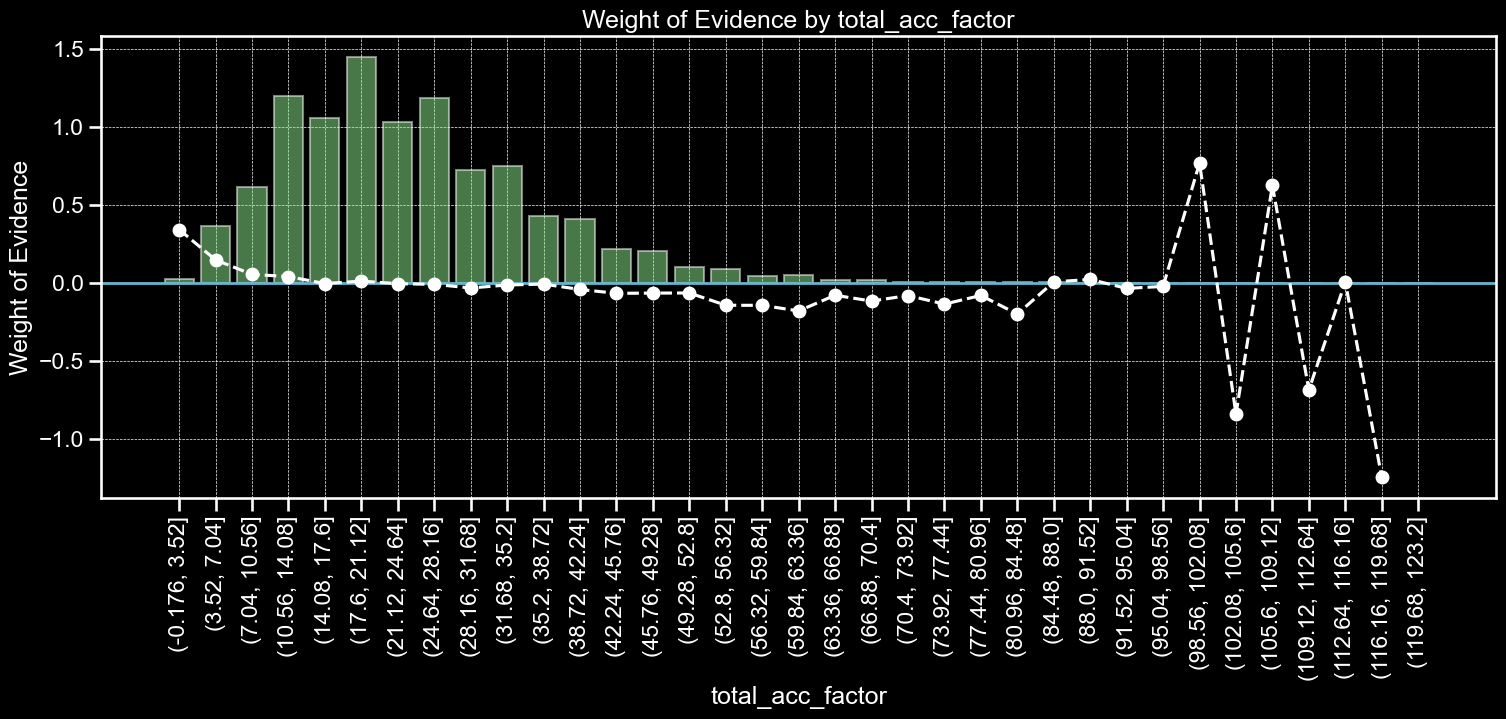

In [192]:
plot_by_woe(df_temp.iloc[:35, :], 90)

In [193]:
dummies['total_acc:<=4'] = np.where((df_inputs_prepr['total_acc'] <= 4), 1, 0)
dummies['total_acc:4-11'] = np.where((df_inputs_prepr['total_acc'] > 4) & (df_inputs_prepr['total_acc'] <= 11), 1, 0)
dummies['total_acc:11-35'] = np.where((df_inputs_prepr['total_acc'] > 11) & (df_inputs_prepr['total_acc'] <= 35), 1, 0)
dummies['total_acc:35-56'] = np.where((df_inputs_prepr['total_acc'] > 35) & (df_inputs_prepr['total_acc'] <= 56), 1, 0)
dummies['total_acc:56-84'] = np.where((df_inputs_prepr['total_acc'] > 56) & (df_inputs_prepr['total_acc'] <= 84), 1, 0)
dummies['total_acc:>84'] = np.where((df_inputs_prepr['total_acc'] > 84), 1, 0)

ref_categorie.append('total_acc:>84')

V: total_rev_hi_lim

In [194]:
df_inputs_prepr['total_rev_hi_lim'].describe()

count    565167.000000
mean      33863.106354
std       36823.850457
min           0.000000
25%       14100.000000
50%       24800.000000
75%       42400.000000
max     9999999.000000
Name: total_rev_hi_lim, dtype: float64

In [195]:
df_inputs_prepr['total_rev_hi_lim'].notnull().value_counts()

total_rev_hi_lim
True    565167
Name: count, dtype: int64

In [196]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'].to_numpy(), 200)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [197]:
st(df_temp.iloc[:10, :])

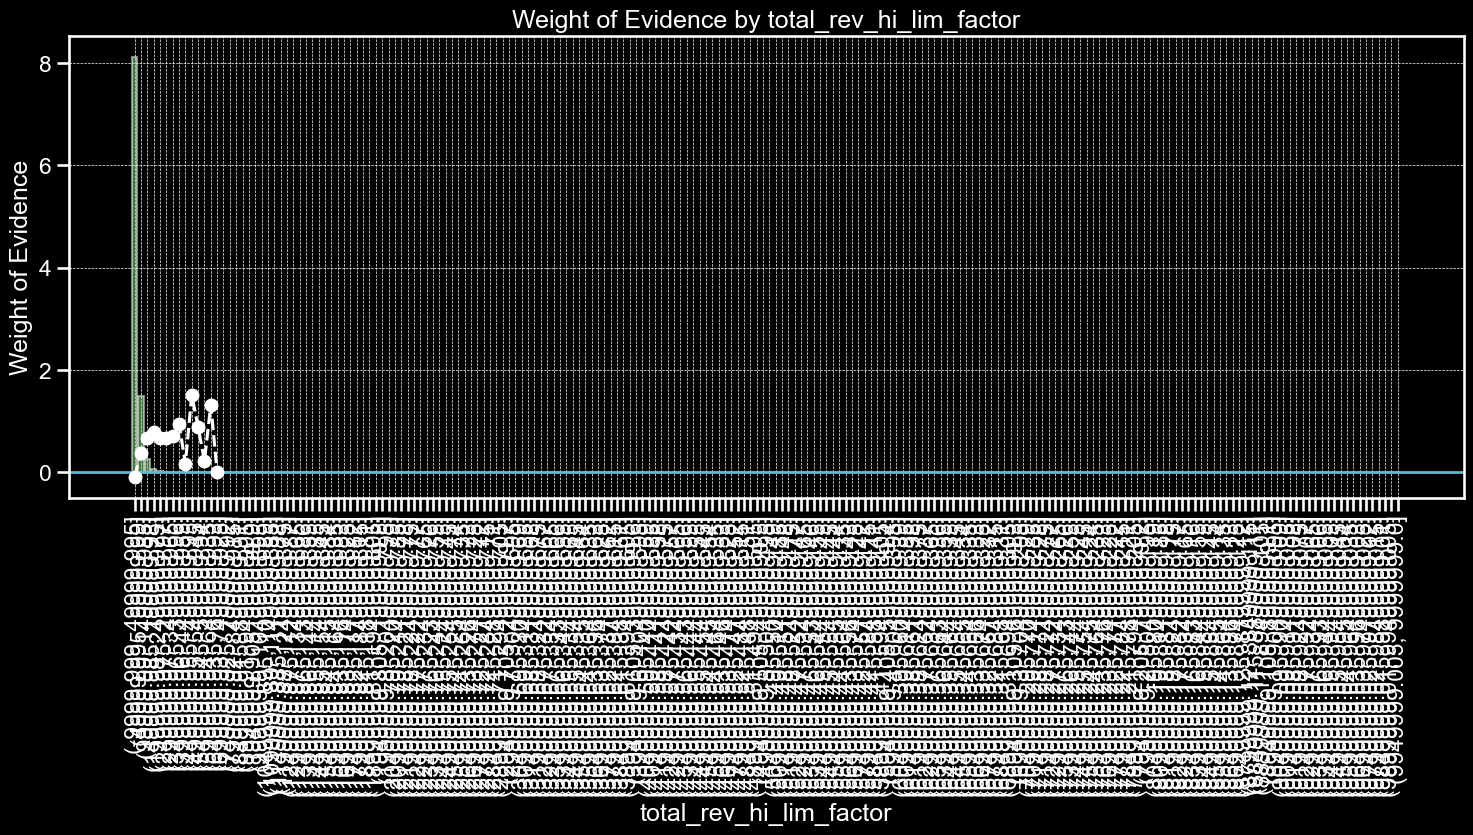

In [198]:
plot_by_woe(df_temp, 90)

In [199]:
dummies['total_rev_hi_lim:<=50k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 50000), 1, 0)
dummies['total_rev_hi_lim:50k-200k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 50000) & (df_inputs_prepr['total_rev_hi_lim'] <= 200000), 1, 0)
dummies['total_rev_hi_lim:>200k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 200000), 1, 0)

ref_categorie.append('total_rev_hi_lim:>200k')


V: acc_now_delinq 

In [200]:
df_inputs_prepr['acc_now_delinq'].describe()

count   565167.000000
mean         0.004176
std          0.071139
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: acc_now_delinq, dtype: float64

In [201]:
df_inputs_prepr['acc_now_delinq'].notnull().value_counts()

acc_now_delinq
True    565167
Name: count, dtype: int64

In [202]:
df_inputs_prepr['acc_now_delinq_factor'] = pd.cut(df_inputs_prepr['acc_now_delinq'], 200)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


In [203]:
st(df_temp.iloc[ :10, :])

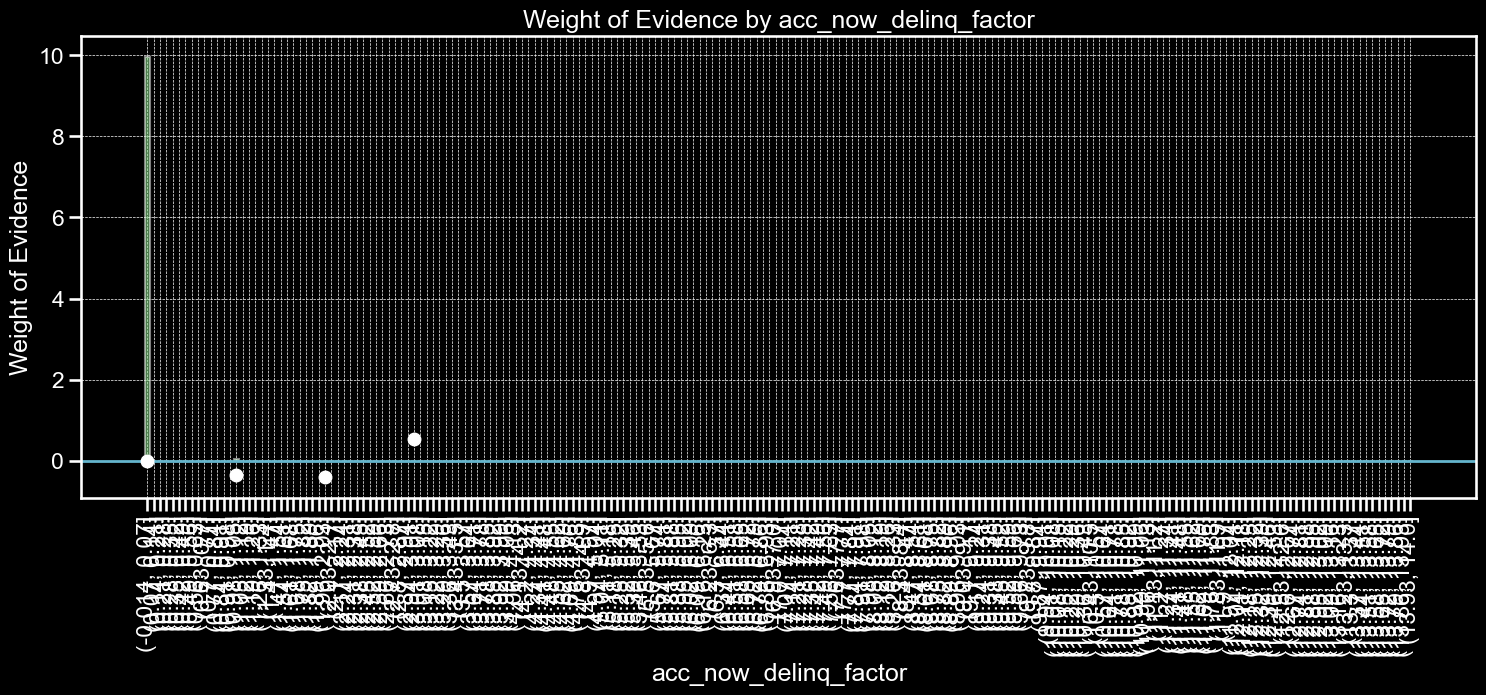

In [204]:
plot_by_woe(df_temp, 90)

In [205]:
dummies['acc_now_delinq:<=0.07'] = np.where((df_inputs_prepr['acc_now_delinq'] <= 0.07), 1, 0)
dummies['acc_now_delinq:>0.07'] = np.where((df_inputs_prepr['acc_now_delinq'] > 0.07), 1, 0)

ref_categorie.append('acc_now_delinq:>0.07')

V: mths_since_last_record

In [206]:
df_inputs_prepr['mths_since_last_record'].describe()

count   89652.000000
mean       72.190715
std        26.501662
min         0.000000
25%        55.000000
50%        74.000000
75%        92.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [207]:
df_inputs_prepr['mths_since_last_record'].isnull().value_counts()

mths_since_last_record
True     475515
False     89652
Name: count, dtype: int64

In [208]:
df_inputs_prepr['mths_since_last_record'].fillna(0, inplace=True)

In [209]:
df_inputs_prepr['mths_since_last_record'].isnull().value_counts()

mths_since_last_record
False    565167
Name: count, dtype: int64

In [210]:
df_inputs_prepr['mths_since_last_record'].isin([0]).sum()

475826

In [211]:
df_inputs_prepr['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 200)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_last_record_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_3016\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [212]:
st(df_temp.iloc[:20, :])

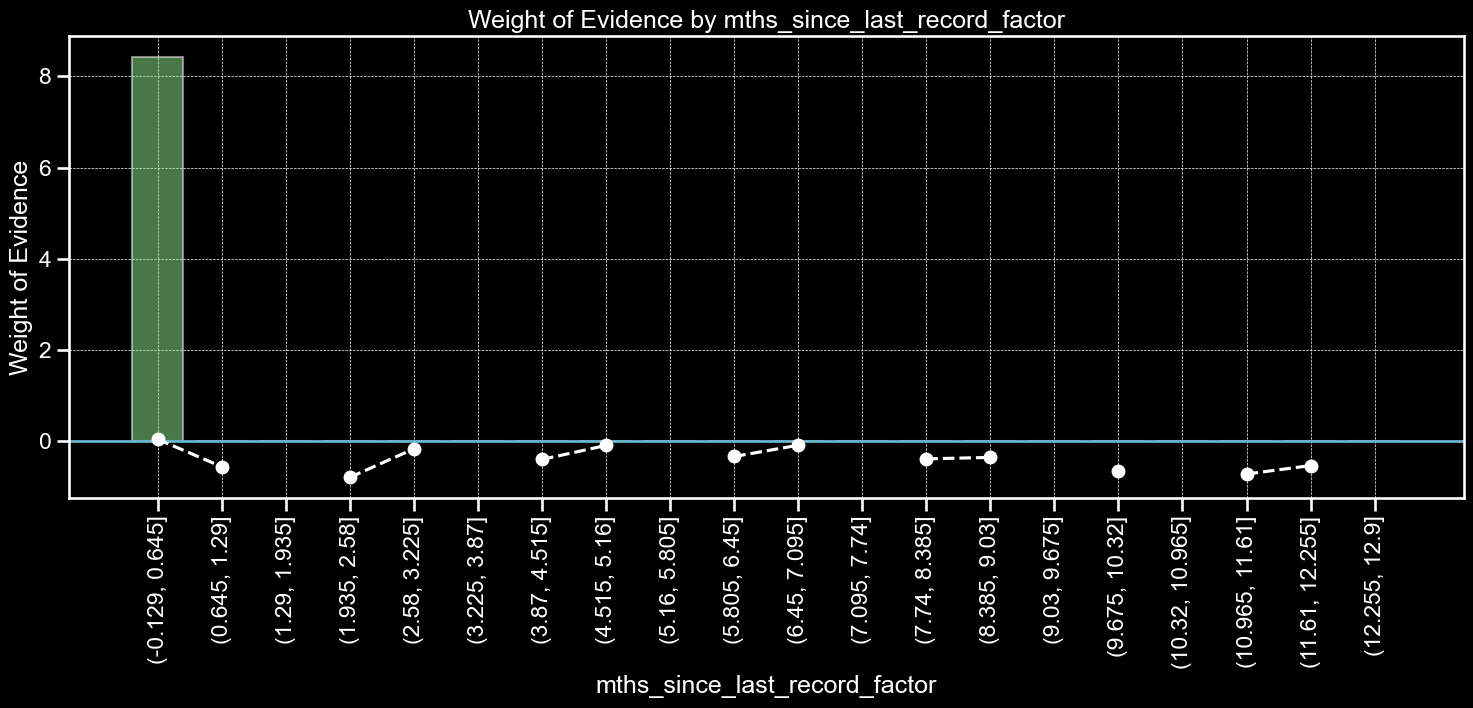

In [213]:
plot_by_woe(df_temp.iloc[:20, :], 90)

In [214]:
dummies['mths_since_last_record:<=0.645'] = np.where((df_inputs_prepr['mths_since_last_record'] <= 0.645), 1, 0)
dummies['mths_since_last_record:>0.645'] = np.where((df_inputs_prepr['mths_since_last_record'] > 0.645), 1, 0)

ref_categorie.append('mths_since_last_record:>0.645')

In [215]:
dummies.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:ONE_ATHER_ANY', 'home_ownership:RENT',
       'home_ownership:OWN',
       ...
       'total_acc:35-56', 'total_acc:56-84', 'total_acc:>84',
       'total_rev_hi_lim:<=50k', 'total_rev_hi_lim:50k-200k',
       'total_rev_hi_lim:>200k', 'acc_now_delinq:<=0.07',
       'acc_now_delinq:>0.07', 'mths_since_last_record:<=0.645',
       'mths_since_last_record:>0.645'],
      dtype='object', length=132)

In [216]:
ref_categorie

['grade:G',
 'home_ownership:ONE_ATHER_ANY',
 'addr_state:IA',
 'verification_status:Verified',
 'purpose:educational__small_business__renewable_energy__moving',
 'initial_list_status:f',
 'term_int:60',
 'emp_length_int:0',
 'mths_since_issue_date:>136',
 'int_rate:>22.772',
 'mths_since_earliest_cr_line:>538',
 'annual_inc:185k-200k',
 'mths_since_last_delinq:Missing',
 'dti:>52',
 'delinq_2yrs:>3.36',
 'inq_last_6mths:>5.28',
 'open_acc:>32',
 'pub_rec:>2',
 'total_acc:>84',
 'total_rev_hi_lim:>200k',
 'acc_now_delinq:>0.07',
 'mths_since_last_record:>0.645']

# Preprocessing the Test Dataset

In [217]:
loan_data_inputs_actual = dummies.copy()
laon_data_targets_actual = df_targets_prepr.copy()

In [218]:
loan_data_inputs_actual.shape, laon_data_targets_actual.shape

((565167, 132), (565167,))

# Export the data, to .csv

In [252]:
# loan_data_inputs_actual.to_csv('loan_data_inputs_actual.csv')
# laon_data_targets_actual.to_csv('laon_data_targets_actual.csv')

# >>> The code up to here is copied form the preprocesing part.

In [220]:
inputs_train_with_ref_cat = pd.read_csv('inputs_train_with_ref_cat.csv', index_col=0)

In [221]:
inputs_actual_with_ref_cat = loan_data_inputs_actual.loc[:, inputs_train_with_ref_cat.columns.values]

In [222]:
inputs_train_with_ref_cat.shape, inputs_actual_with_ref_cat.shape #((1808534, 80), (2260701, 80)), ((1808534, 80), (1017300, 80))

((1808534, 80), (565167, 80))

In [223]:
df_scorecard = pd.read_csv('df_scorecard.csv', index_col=0)

In [224]:
df_scorecard.head()

index Features Name  Coefficient  P-values Original feature name  \
0      0     Intercept    -0.076301       NaN             Intercept   
1      1       grade:A     1.613924  0.000000                 grade   
2      2       grade:B     1.174069  0.000000                 grade   
3      3       grade:C     0.871421  0.000000                 grade   
4      4       grade:D     0.623807  0.000000                 grade   

   Score - Calculation  Score - Preliminary  Score - Final  
0           369.882169                  370            370  
1            97.968028                   98             98  
2            71.268034                   71             71  
3            52.896798                   53             53  
4            37.866165                   38             38

In [225]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat.copy()
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Features Name'].values]
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
305053           1        0        0        0        1        0        0   
50247            1        0        0        1        0        0        0   
1630001          1        0        0        1        0        0        0   
927626           1        0        0        1        0        0        0   
758488           1        0        0        1        0        0        0   

         verification_status:Not Verified  \
305053                                  0   
50247                                   1   
1630001                                 0   
927626                                  0   
758488                                  0   

         verification_status:Source Verified  purpose:debt_consolidation  \
305053                                     1                           1   
50247                                      0                           0   
1630001                                    1                           1   
927626                                     0                           1   
758488                                     0                           1   

         purpose:medical_wedding_other_house_vacation_major_purchase  \
305053                                                   0             
50247                                                    0             
1630001                                                  0             
927626                                                   0             
758488                                                   0             

         purpose:home_improvement  purpose:credit_card  purpose:car  \
305053                          0                    0            0   
50247                           0                    1            0   
1630001                         0                    0            0   
927626                          0                    0            0   
758488                          0                    0            0   

         initial_list_status:w  term_int:36  emp_length_int:1  \
305053                       0            1                 0   
50247                        1            0                 0   
1630001                      1            1                 0   
927626                       1            1                 0   
758488                       1            1                 0   

         emp_length_int:2-6  emp_length_int:7-9  emp_length_int:10  \
305053                    0                   0                  0   
50247                     0                   0                  0   
1630001                   0                   0                  1   
927626                    1                   0                  0   
758488                    0                   0                  1   

         mths_since_issue_date:<40  mths_since_issue_date:40-43  \
305053                           0                            0   
50247                            1                            0   
1630001                          0                            0   
927626                           0                            0   
758488                           0                            0   

         mths_since_issue_date:44-45  mths_since_issue_date:46-48  \
305053                             1                            0   
50247                              0                            0   
1630001                            0                            0   
927626                             0                            0   
758488                             0                            0   

         mths_since_issue_date:47-51  mths_since_issue_date:52-55  \
305053                             0                            0   
50247                              0                            0   
1630001                            0                            0   
927626                             0                      

In [226]:
inputs_actual_with_ref_cat_w_intercept = inputs_actual_with_ref_cat.copy()
inputs_actual_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_actual_with_ref_cat_w_intercept = inputs_actual_with_ref_cat_w_intercept[df_scorecard['Features Name'].values]
inputs_actual_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        0        1        0        0        0        0   
1          1        0        1        0        0        0        0   
2          1        0        1        0        0        0        0   
3          1        0        0        1        0        0        0   
4          1        0        1        0        0        0        0   

   verification_status:Not Verified  verification_status:Source Verified  \
0                                 0                                    1   
1                                 0                                    1   
2                                 1                                    0   
3                                 1                                    0   
4                                 0                                    1   

   purpose:debt_consolidation  \
0                           0   
1                           0   
2                           0   
3                           1   
4                           1   

   purpose:medical_wedding_other_house_vacation_major_purchase  \
0                                                  1             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   purpose:home_improvement  purpose:credit_card  purpose:car  \
0                         0                    0            0   
1                         1                    0            0   
2                         0                    1            0   
3                         0                    0            0   
4                         0                    0            0   

   initial_list_status:w  term_int:36  emp_length_int:1  emp_length_int:2-6  \
0                      1            1                 0                   0   
1                      1            0                 0                   0   
2                      0            1                 0                   1   
3                      1            0                 1                   0   
4                      1            1                 0                   0   

   emp_length_int:7-9  emp_length_int:10  mths_since_issue_date:<40  \
0                   1                  0                          0   
1                   0                  1                          0   
2                   0                  0                          0   
3                   0                  0                          0   
4                   0                  1                          0   

   mths_since_issue_date:40-43  mths_since_issue_date:44-45  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            1                            0   

   mths_since_issue_date:46-48  mths_since_issue_date:47-51  \
0                            1                            0   
1                            0                            1   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   mths_since_issue_date:52-55  mths_since_issue_date:55-59  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   mths_since_issue_date:60-65  mths_since_issue_date:66-76  \
0                            0      

In [227]:
scorecard_score = df_scorecard['Score - Final']
scorecard_score = scorecard_score.values.reshape(81, 1)

In [228]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_score)
y_scores_train.head()

0
305053   516
50247    691
1630001  510
927626   465
758488   472

In [229]:
y_scores_actual = inputs_actual_with_ref_cat_w_intercept.dot(scorecard_score)
y_scores_actual.head()

0
0  576
1  551
2  519
3  460
4  638

In [230]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis=1)
inputs_actual_with_ref_cat_w_intercept = pd.concat([inputs_actual_with_ref_cat_w_intercept, y_scores_actual], axis=1)

In [231]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_actual_with_ref_cat_w_intercept.columns.values[inputs_actual_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'

In [232]:
inputs_actual_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        0        1        0        0        0        0   
1          1        0        1        0        0        0        0   
2          1        0        1        0        0        0        0   
3          1        0        0        1        0        0        0   
4          1        0        1        0        0        0        0   

   verification_status:Not Verified  verification_status:Source Verified  \
0                                 0                                    1   
1                                 0                                    1   
2                                 1                                    0   
3                                 1                                    0   
4                                 0                                    1   

   purpose:debt_consolidation  \
0                           0   
1                           0   
2                           0   
3                           1   
4                           1   

   purpose:medical_wedding_other_house_vacation_major_purchase  \
0                                                  1             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   purpose:home_improvement  purpose:credit_card  purpose:car  \
0                         0                    0            0   
1                         1                    0            0   
2                         0                    1            0   
3                         0                    0            0   
4                         0                    0            0   

   initial_list_status:w  term_int:36  emp_length_int:1  emp_length_int:2-6  \
0                      1            1                 0                   0   
1                      1            0                 0                   0   
2                      0            1                 0                   1   
3                      1            0                 1                   0   
4                      1            1                 0                   0   

   emp_length_int:7-9  emp_length_int:10  mths_since_issue_date:<40  \
0                   1                  0                          0   
1                   0                  1                          0   
2                   0                  0                          0   
3                   0                  0                          0   
4                   0                  1                          0   

   mths_since_issue_date:40-43  mths_since_issue_date:44-45  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            1                            0   

   mths_since_issue_date:46-48  mths_since_issue_date:47-51  \
0                            1                            0   
1                            0                            1   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   mths_since_issue_date:52-55  mths_since_issue_date:55-59  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   mths_since_issue_date:60-65  mths_since_issue_date:66-76  \
0                            0      

In [233]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)


In [234]:
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
305053           1        0        0        0        1        0        0   
50247            1        0        0        1        0        0        0   
1630001          1        0        0        1        0        0        0   
927626           1        0        0        1        0        0        0   
758488           1        0        0        1        0        0        0   

         verification_status:Not Verified  \
305053                                  0   
50247                                   1   
1630001                                 0   
927626                                  0   
758488                                  0   

         verification_status:Source Verified  purpose:debt_consolidation  \
305053                                     1                           1   
50247                                      0                           0   
1630001                                    1                           1   
927626                                     0                           1   
758488                                     0                           1   

         purpose:medical_wedding_other_house_vacation_major_purchase  \
305053                                                   0             
50247                                                    0             
1630001                                                  0             
927626                                                   0             
758488                                                   0             

         purpose:home_improvement  purpose:credit_card  purpose:car  \
305053                          0                    0            0   
50247                           0                    1            0   
1630001                         0                    0            0   
927626                          0                    0            0   
758488                          0                    0            0   

         initial_list_status:w  term_int:36  emp_length_int:1  \
305053                       0            1                 0   
50247                        1            0                 0   
1630001                      1            1                 0   
927626                       1            1                 0   
758488                       1            1                 0   

         emp_length_int:2-6  emp_length_int:7-9  emp_length_int:10  \
305053                    0                   0                  0   
50247                     0                   0                  0   
1630001                   0                   0                  1   
927626                    1                   0                  0   
758488                    0                   0                  1   

         mths_since_issue_date:<40  mths_since_issue_date:40-43  \
305053                           0                            0   
50247                            1                            0   
1630001                          0                            0   
927626                           0                            0   
758488                           0                            0   

         mths_since_issue_date:44-45  mths_since_issue_date:46-48  \
305053                             1                            0   
50247                              0                            0   
1630001                            0                            0   
927626                             0                            0   
758488                             0                            0   

         mths_since_issue_date:47-51  mths_since_issue_date:52-55  \
305053                             0                            0   
50247                              0                            0   
1630001                            0                            0   
927626                             0                      

In [235]:
inputs_actual_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_actual_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_actual_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_actual_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_actual_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)


In [236]:
inputs_actual_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        0        1        0        0        0        0   
1          1        0        1        0        0        0        0   
2          1        0        1        0        0        0        0   
3          1        0        0        1        0        0        0   
4          1        0        1        0        0        0        0   

   verification_status:Not Verified  verification_status:Source Verified  \
0                                 0                                    1   
1                                 0                                    1   
2                                 1                                    0   
3                                 1                                    0   
4                                 0                                    1   

   purpose:debt_consolidation  \
0                           0   
1                           0   
2                           0   
3                           1   
4                           1   

   purpose:medical_wedding_other_house_vacation_major_purchase  \
0                                                  1             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   purpose:home_improvement  purpose:credit_card  purpose:car  \
0                         0                    0            0   
1                         1                    0            0   
2                         0                    1            0   
3                         0                    0            0   
4                         0                    0            0   

   initial_list_status:w  term_int:36  emp_length_int:1  emp_length_int:2-6  \
0                      1            1                 0                   0   
1                      1            0                 0                   0   
2                      0            1                 0                   1   
3                      1            0                 1                   0   
4                      1            1                 0                   0   

   emp_length_int:7-9  emp_length_int:10  mths_since_issue_date:<40  \
0                   1                  0                          0   
1                   0                  1                          0   
2                   0                  0                          0   
3                   0                  0                          0   
4                   0                  1                          0   

   mths_since_issue_date:40-43  mths_since_issue_date:44-45  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            1                            0   

   mths_since_issue_date:46-48  mths_since_issue_date:47-51  \
0                            1                            0   
1                            0                            1   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   mths_since_issue_date:52-55  mths_since_issue_date:55-59  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   mths_since_issue_date:60-65  mths_since_issue_date:66-76  \
0                            0      

# Population Stability Index: Calculation and interpretation

In [237]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / int(inputs_train_with_ref_cat_w_intercept.shape[0])

Actual data = Present dat || Expected data = Past data

In [238]:
PSI_calc_actual = inputs_actual_with_ref_cat_w_intercept.sum() / int(inputs_actual_with_ref_cat_w_intercept.shape[0])

In [239]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_actual], axis=1)

In [240]:
PSI_calc.head()

0        1
Intercept 1.000000 1.000000
grade:A   0.191594 0.191681
grade:B   0.293653 0.293573
grade:C   0.287462 0.287473
grade:D   0.143547 0.143680

In [241]:
PSI_calc = PSI_calc.reset_index()

In [242]:
PSI_calc.head()

index        0        1
0  Intercept 1.000000 1.000000
1    grade:A 0.191594 0.191681
2    grade:B 0.293653 0.293573
3    grade:C 0.287462 0.287473
4    grade:D 0.143547 0.143680

In [243]:
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original_feature_name']

In [244]:
PSI_calc.head()

index  Proportions_Train  Proportions_New Original_feature_name
0  Intercept           1.000000         1.000000             Intercept
1    grade:A           0.191594         0.191681                 grade
2    grade:B           0.293653         0.293573                 grade
3    grade:C           0.287462         0.287473                 grade
4    grade:D           0.143547         0.143680                 grade

In [245]:
PSI_calc = PSI_calc[['index', 'Original_feature_name', 'Proportions_Train', 'Proportions_New']] # or PSI_calc = PSI_calc[np.array(['index', 'Original_feature_name', 'Proportions_Train', 'Proportions_New'])]

In [246]:
PSI_calc.head()

index Original_feature_name  Proportions_Train  Proportions_New
0  Intercept             Intercept           1.000000         1.000000
1    grade:A                 grade           0.191594         0.191681
2    grade:B                 grade           0.293653         0.293573
3    grade:C                 grade           0.287462         0.287473
4    grade:D                 grade           0.143547         0.143680

In [247]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]

In [248]:
PSI_calc.head()

index Original_feature_name  Proportions_Train  Proportions_New
1  grade:A                 grade           0.191594         0.191681
2  grade:B                 grade           0.293653         0.293573
3  grade:C                 grade           0.287462         0.287473
4  grade:D                 grade           0.143547         0.143680
5  grade:E                 grade           0.059790         0.059913

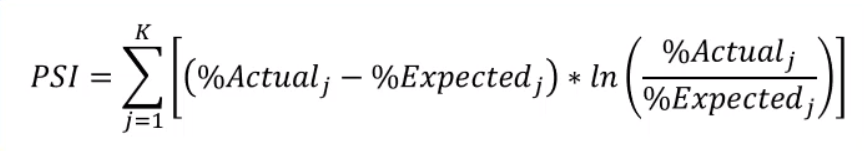

In [249]:
condition = (PSI_calc['Proportions_New'] > 0) & (PSI_calc['Proportions_Train'] > 0)
difference_New_Train = PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']
log_New_Train = np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train'])

PSI_calc['Contribution'] = np.where(condition, (difference_New_Train * log_New_Train), 0)


In [250]:
PSI_calc

index  \
1                                             grade:A   
2                                             grade:B   
3                                             grade:C   
4                                             grade:D   
5                                             grade:E   
6                                             grade:F   
7                    verification_status:Not Verified   
8                 verification_status:Source Verified   
9                          purpose:debt_consolidation   
10  purpose:medical_wedding_other_house_vacation_m...   
11                           purpose:home_improvement   
12                                purpose:credit_card   
13                                        purpose:car   
14                              initial_list_status:w   
15                                        term_int:36   
16                                   emp_length_int:1   
17                                 emp_length_int:2-6   
18                                 emp_length_int:7-9   
19                                  emp_length_int:10   
20                          mths_since_issue_date:<40   
21                        mths_since_issue_date:40-43   
22                        mths_since_issue_date:44-45   
23                        mths_since_issue_date:46-48   
24                        mths_since_issue_date:47-51   
25                        mths_since_issue_date:52-55   
26                        mths_since_issue_date:55-59   
27                        mths_since_issue_date:60-65   
28                        mths_since_issue_date:66-76   
29                        mths_since_issue_date:77-96   
30                       mths_since_issue_date:97-113   
31                      mths_since_issue_date:114-135   
32                                    int_rate:<8.392   
33                              int_rate:8.392-11.987   
34                             int_rate:11.987-15.068   
35                             int_rate:15.068-22.772   
36                    mths_since_earliest_cr_line:<22   
37                  mths_since_earliest_cr_line:22-41   
38                  mths_since_earliest_cr_line:42-62   
39                 mths_since_earliest_cr_line:63-144   
40                mths_since_earliest_cr_line:145-310   
41                mths_since_earliest_cr_line:311-537   
42                                    annual_inc:<=5k   
43                                  annual_inc:5k-10k   
44                                 annual_inc:10k-30k   
45                                 annual_inc:30k-45k   
46                                 annual_inc:45k-65k   
47                                 annual_inc:65k-85k   
48                                annual_inc:85k-100k   
49                               annual_inc:100k-125k   
50                               annual_inc:125k-160k   
51                               annual_inc:160k-185k   
52                                   annual_inc:>200k   
53                         mths_since_last_delinq:0-4   
54                        mths_since_last_delinq:5-19   
55                       mths_since_last_delinq:20-85   
56                         mths_since_last_delinq:>86   
57                              inq_last_6mths:<=1.32   
58                            inq_last_6mths:1.32-3.3   
59                            inq_last_6mths:3.3-5.28   
60                                       open_acc:<=6   
61                                       open_acc:6-8   
62                                      open_acc:8-32   
63                             total_rev_hi_lim:<=50k   
64                          total_rev_hi_lim:50k-200k   
65                              acc_now_delinq:<=0.07   
66                                            grade:G   
67                       verification_status:Verified   
68  purpose:educational__small_business__renewable...   
69                              initial_list_status:f   
70                                        term_int:60   
7

Population Stability Index for each feature

In [251]:
PSI_calc.groupby('Original_feature_name')['Contribution'].sum()

Original_feature_name
Score                         0.000010
acc_now_delinq                0.000000
annual_inc                    0.000006
emp_length_int                0.000015
grade                         0.000004
initial_list_status           0.000004
inq_last_6mths                0.000005
int_rate                      0.000008
mths_since_earliest_cr_line   0.000010
mths_since_issue_date         0.000018
mths_since_last_delinq        0.000004
open_acc                      0.000001
purpose                       0.000005
term_int                      0.000000
total_rev_hi_lim              0.000005
verification_status           0.000004
Name: Contribution, dtype: float64

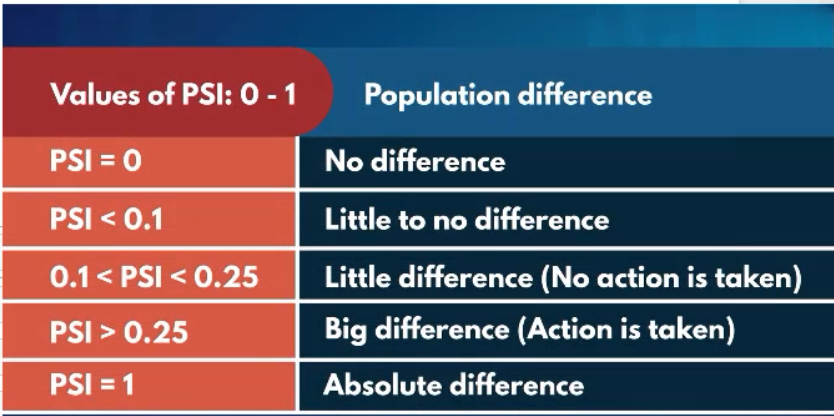